In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from bs4 import BeautifulSoup
from env import api_key
import time
import json
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")
import prepare
import re
from time import sleep

In [2]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

    
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()
    
    
    
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
    
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
    
    
def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()    

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 6), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat) 

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()


# Exploration

- Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- inhibitor lost team 100, team_jungleMinionsKilled_100, team_killsplayer_100, team_level_100, team_minionsKilled_100.
- repeat above but for 200 team
- dragaon team effects the outcome of the game

Bivariate Study

- winning team and blue team level > 50, also < 50
- same for red team
- team_magicDamageDoneToChampions_100 > the average, also < average
- run same for 200
- winning team and team_physicalDamageDoneToChampions_100 > average, also < average
- run same for 200

Multivariate Study

-  blue team takes dragons and blue team assists effects the outcome of the game
- blue wards and blue towers taken effects the outcome of the game
- blue damage is more important then red damage will efect the outcome
- Red towers lost and total red team damage will effect the outcome of a red team win


In [3]:
df = pd.read_csv('final.csv')

df

,Unnamed: 0,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,baron_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,gameMode,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_7,killsplayer_8,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,riftherald_team200,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,inhibs_lost_team100,killsplayer_6,killsplayer_9,riftherald_team100,ward_player_0,killsplayer_0,riftherald_team300,team_deathsplayer_100,team_deathsplayer_200,team_goldPerSecond_100,team_goldPerSecond_200,team_jungleMinionsKilled_100,team_jungleMinionsKilled_200,team_killsplayer_100,team_killsplayer_200,team_level_100,team_level_200,team_magicDamageDoneToChampions_100,team_magicDamageDoneToChampions_200,team_minionsKilled_100,team_minionsKilled_200,team_physicalDamageDoneToChampions_100,team_physicalDamageDoneToChampions_200,team_timeEnemySpentControlled_100,team_timeEnemySpentControlled_200,team_totalDamageDoneToChampions_100,team_totalDamageDoneToChampions_200,team_totalGold_100,team_totalGold_200,team_trueDamageDoneToChampions_100,team_trueDamageDoneToChampions_200,team_ward_player_100,team_ward_player_200,team_assistsplayer_10

In [4]:
# Use prep to alter the dataframe
# Use prep to alter the dataframe
def prep(df):
    df = df.rename(columns={ 'team_deathsplayer_100':'BlueTeamDeaths', 'team_deathsplayer_200':'RedTeamDeaths', 'team_goldPerSecond_100':'BlueTeamGoldPerSec', 'team_goldPerSecond_200':'RedTeamGoldPerSec', 'team_jungleMinionsKilled_100':'BlueTeamJungleMinionsKilled', 'team_jungleMinionsKilled_200':'RedTeamJungleMinionsKilled', 'team_killsplayer_100':'BlueTeamKills', 'team_killsplayer_200':'RedTeamKills', 'team_level_100':'BlueTeamLevel', 'team_level_200':'RedTeamLevel', 'team_magicDamageDoneToChampions_100':'BlueTeamMagicDamageDoneToChampions', 'team_magicDamageDoneToChampions_200':'RedTeamMagicDamageDoneToChampions', 'team_minionsKilled_100':'BlueTeamMinionsKilled', 'team_minionsKilled_200':'RedTeamMinionsKilled', 'team_physicalDamageDoneToChampions_100':'BlueTeamPhysicalDamageDoneToChampions', 'team_physicalDamageDoneToChampions_200':'RedTeamPhysicalDamageDoneToChampions', 'team_timeEnemySpentControlled_100':'BlueTeamTimeEnemySpentControlled', 'team_timeEnemySpentControlled_200':'RedTeamTimeEnemySpentControlled', 'team_totalDamageDoneToChampions_100':'BlueTeamTotalDamageDoneToChampions', 'team_totalDamageDoneToChampions_200':'RedTeamTotalDamageDoneToChampions', 'team_totalGold_100':'BlueTeamTotalGold', 'team_totalGold_200':'RedTeamTotalGold', 'team_trueDamageDoneToChampions_100':'BlueTeamTrueDamageDoneToChampions', 'team_trueDamageDoneToChampions_200':'RedTeamTrueDamageDoneToChampions', 'team_ward_player_100':'BlueTeamWards', 'team_ward_player_200':'RedTeamWards', 'team_assistsplayer_100':'BlueTeamAssists', 'team_assistsplayer_200':'RedTeamAssists', 'team_xp_100':'BlueTeamXp', 'team_xp_200':'RedTeamXp'})
    return df
df = prep(df)

In [5]:
df

,Unnamed: 0,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,baron_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,gameMode,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_7,killsplayer_8,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,riftherald_team200,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,inhibs_lost_team100,killsplayer_6,killsplayer_9,riftherald_team100,ward_player_0,killsplayer_0,riftherald_team300,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,BlueTeamTotalDamageDoneToChampions,RedTeamTotalDamageDoneToChampions,BlueTeamTotalGold,RedTeamTotalGold,BlueTeamTrueDamageDoneToChampions,RedTeamTrueDamageDoneToChampions,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,Unnamed: 0.1
0,0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,1

In [6]:
df1 = df.drop(columns=['gameMode', 'gameType','gameVersion'])

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#let's split our data using my train_validate_test function, and check our train, validate, and test shapes. Our target is tax_value.
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns train, validate, test sets and also another 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

target = 'winningTeam'
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)
train.shape, validate.shape, test.shape

((2651, 210), (1137, 210), (948, 210))

# Univariate 

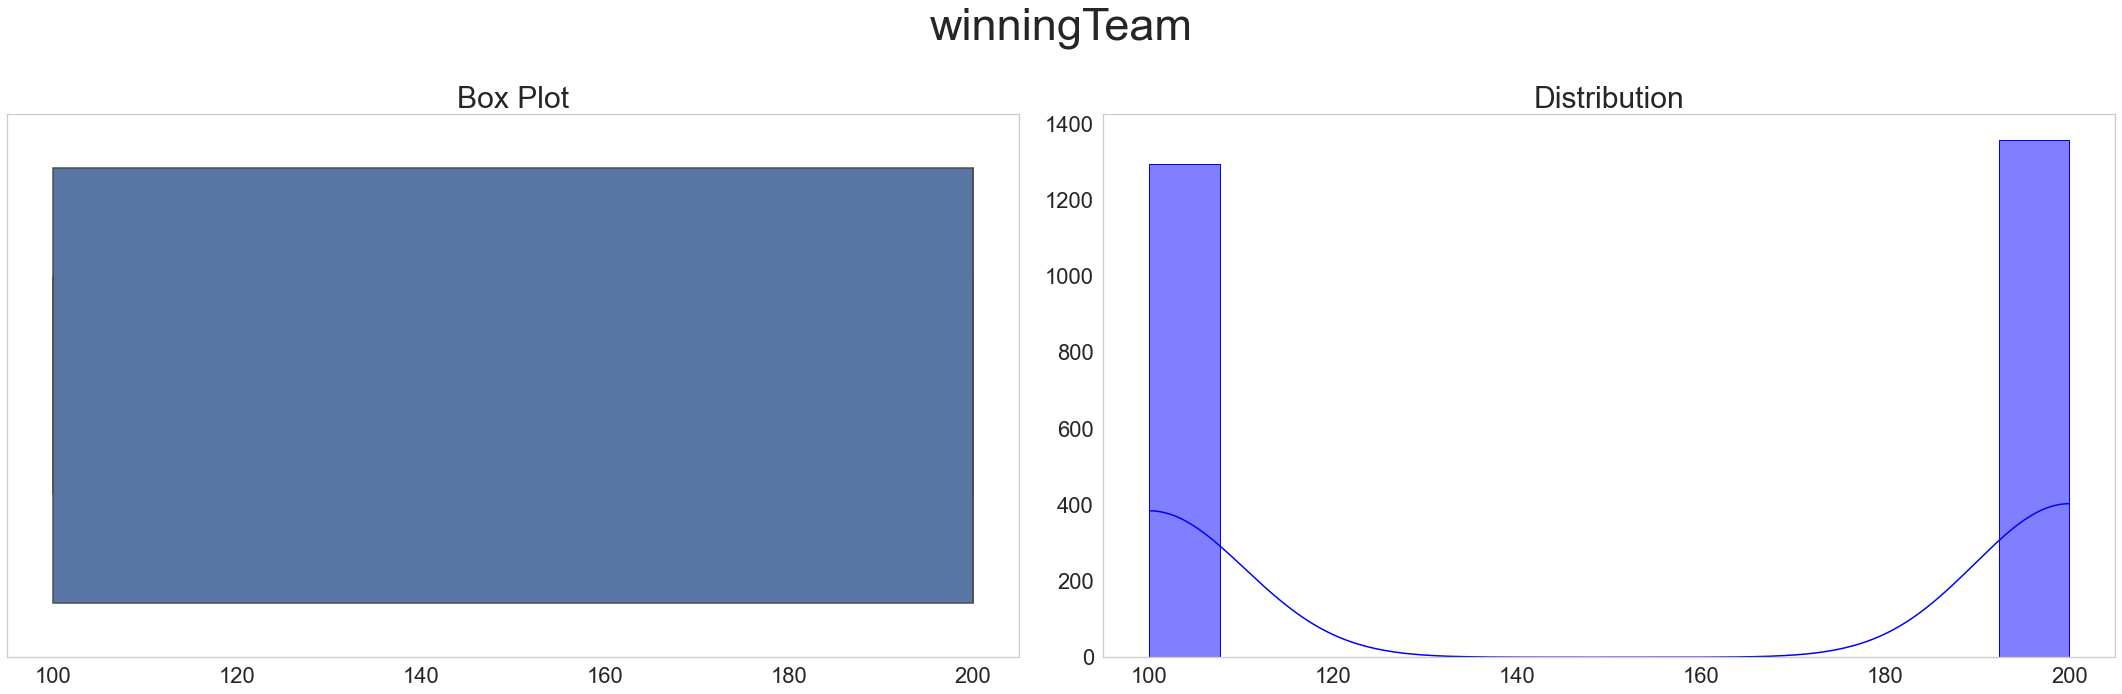

Summary Statistics for winningTeam
count    2651.000000
mean      151.188231
std        49.995309
min       100.000000
25%       100.000000
50%       200.000000
75%       200.000000
max       200.000000
Name: winningTeam, dtype: float64


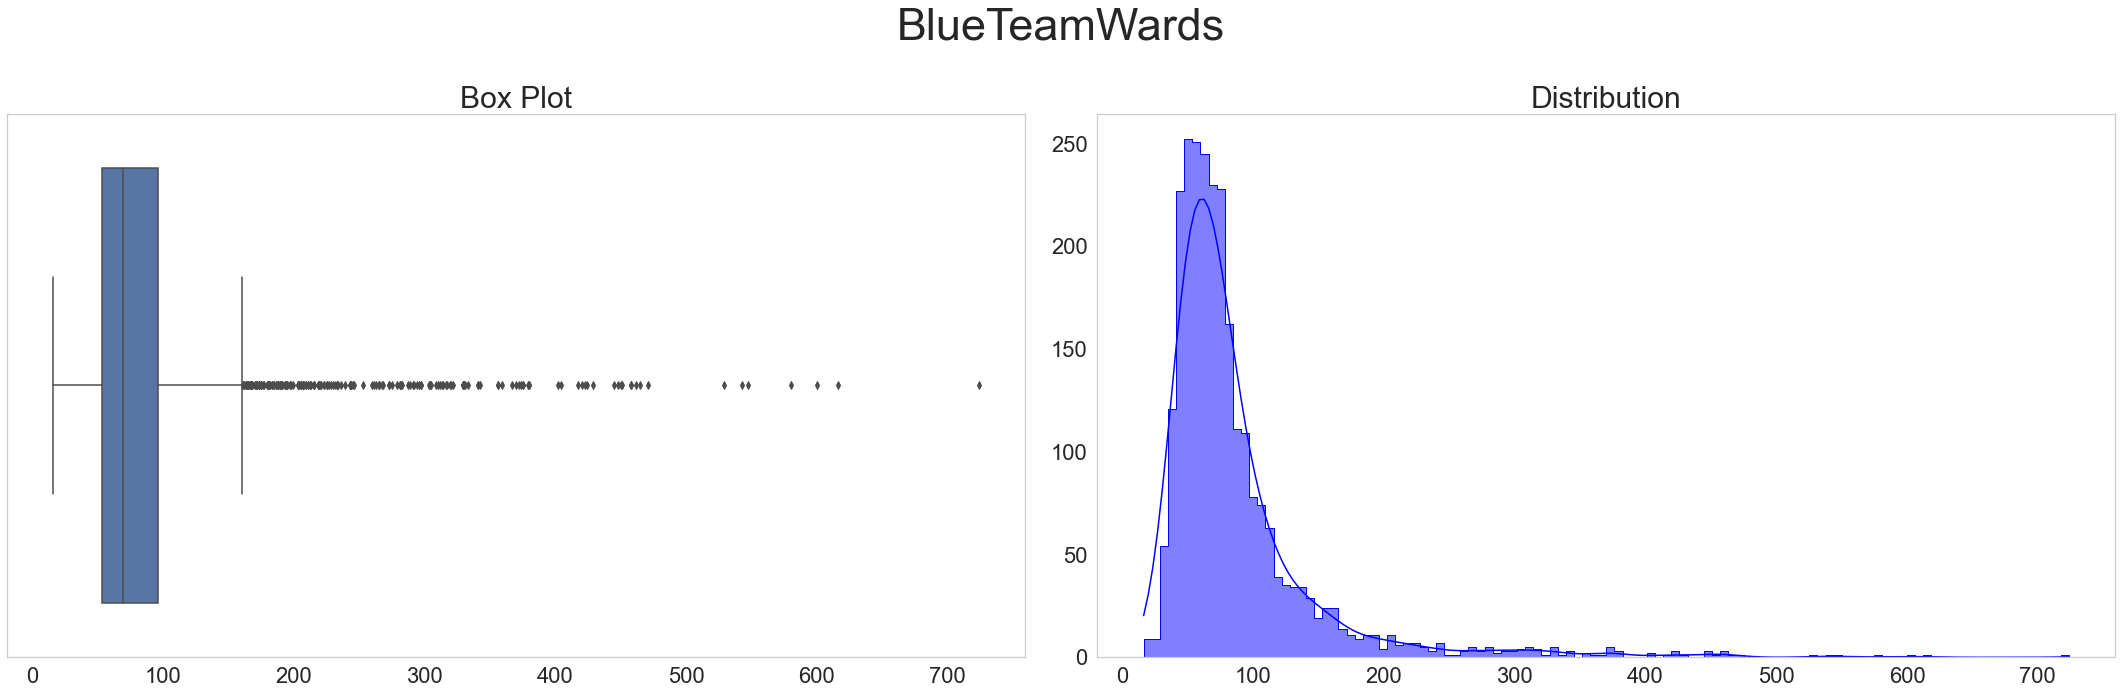

Summary Statistics for BlueTeamWards
count    2651.000000
mean       87.310826
std        63.997081
min        16.000000
25%        53.000000
50%        69.000000
75%        96.000000
max       724.000000
Name: BlueTeamWards, dtype: float64


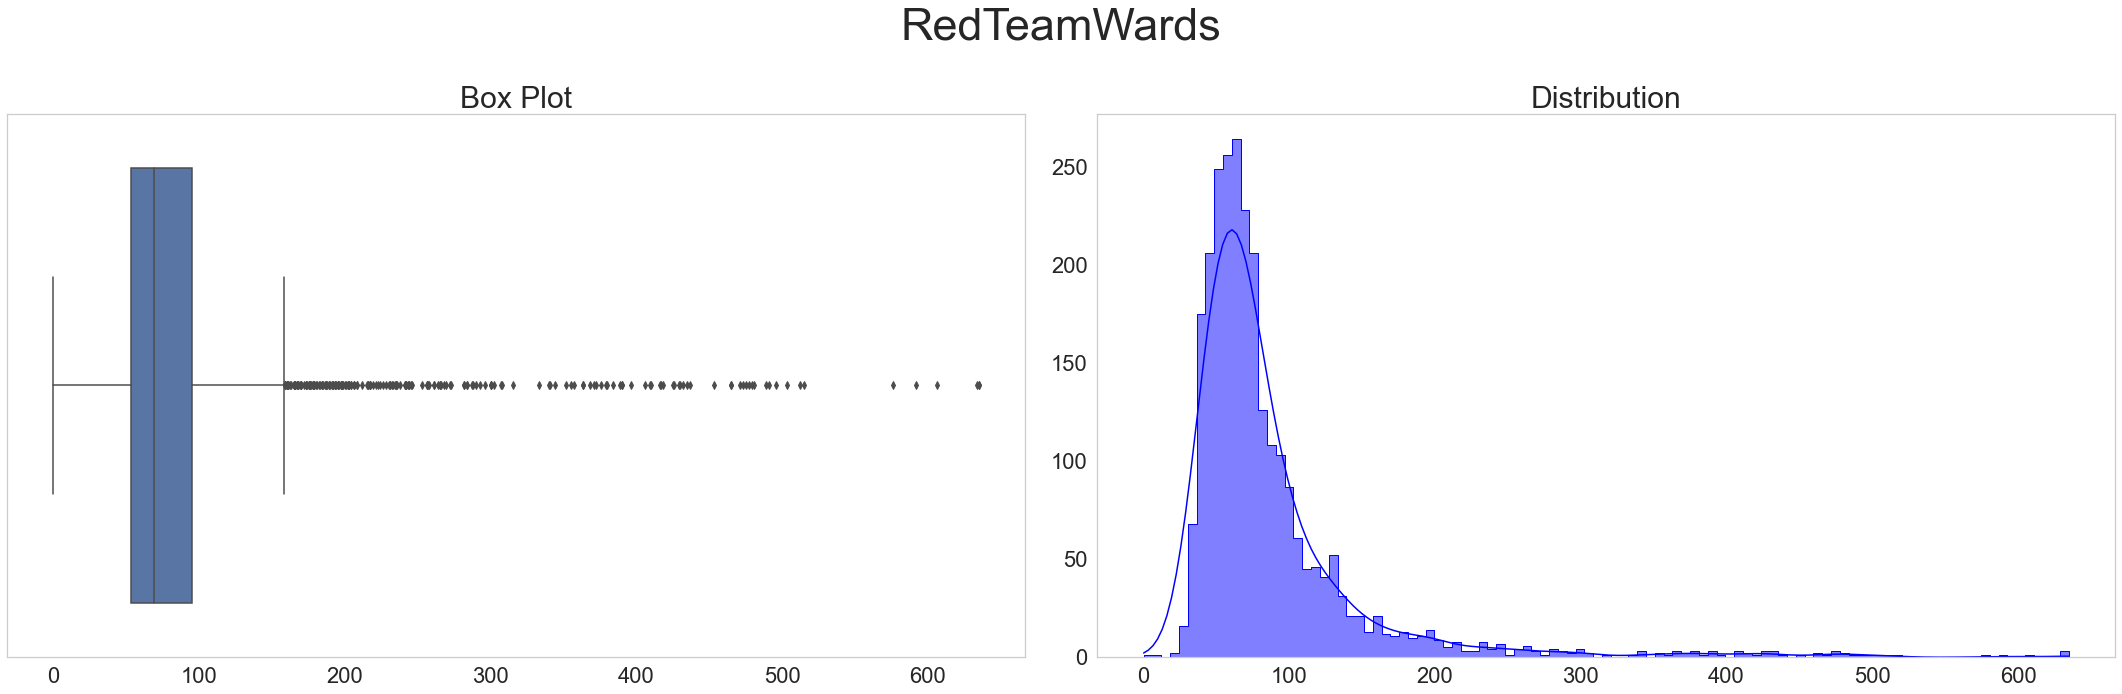

Summary Statistics for RedTeamWards
count    2651.000000
mean       87.872124
std        67.803856
min         0.000000
25%        53.000000
50%        69.000000
75%        95.000000
max       635.000000
Name: RedTeamWards, dtype: float64


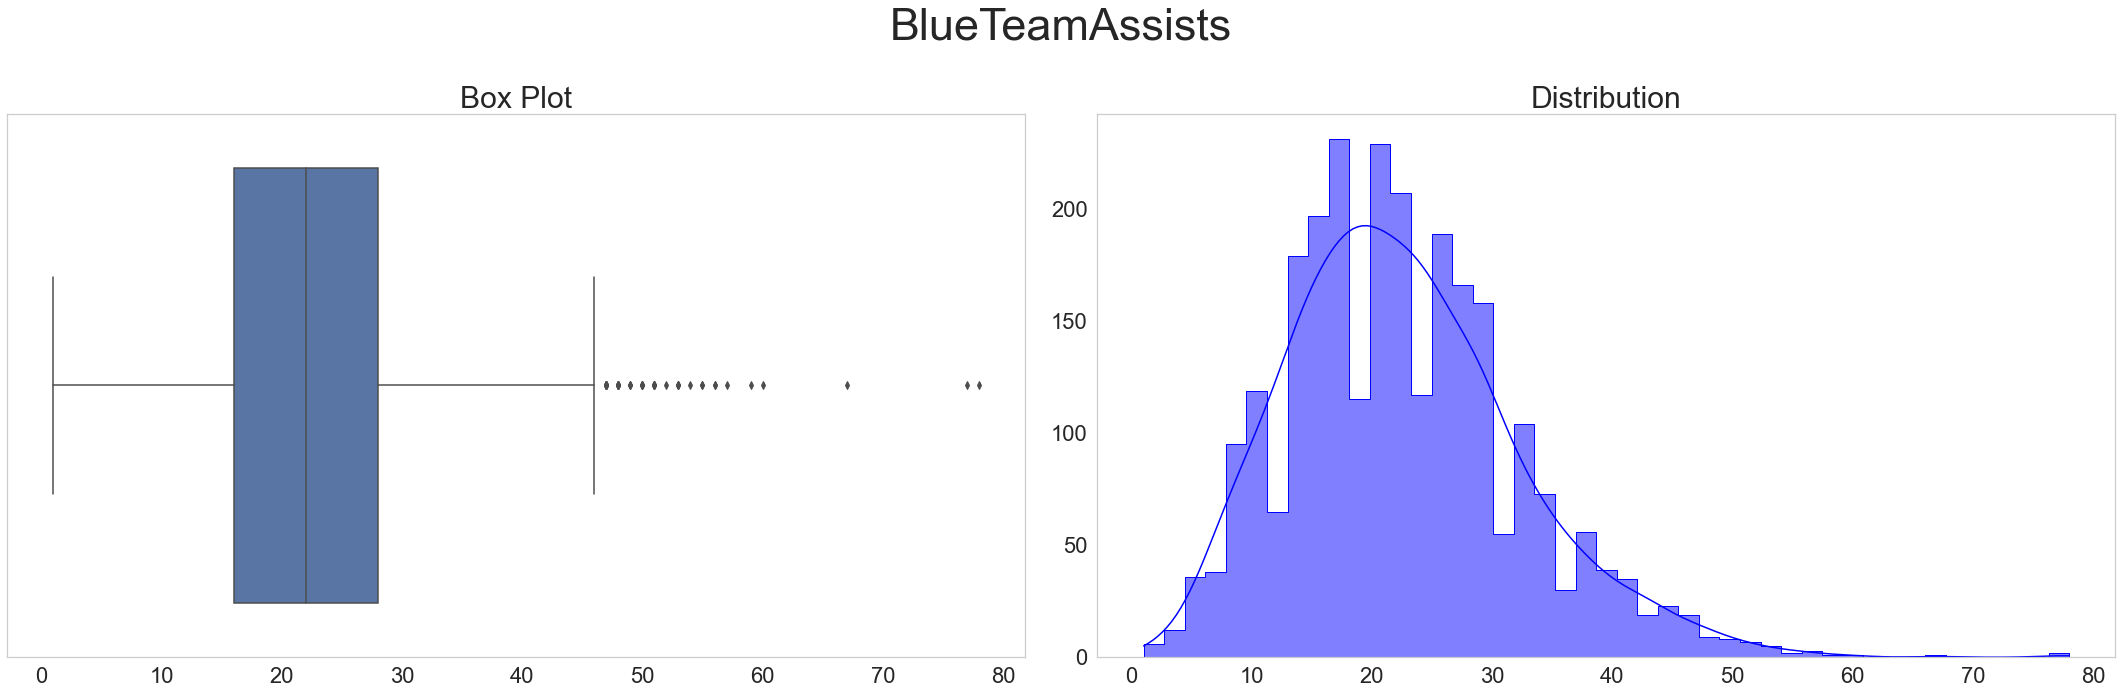

Summary Statistics for BlueTeamAssists
count    2651.000000
mean       22.576386
std         9.720301
min         1.000000
25%        16.000000
50%        22.000000
75%        28.000000
max        78.000000
Name: BlueTeamAssists, dtype: float64


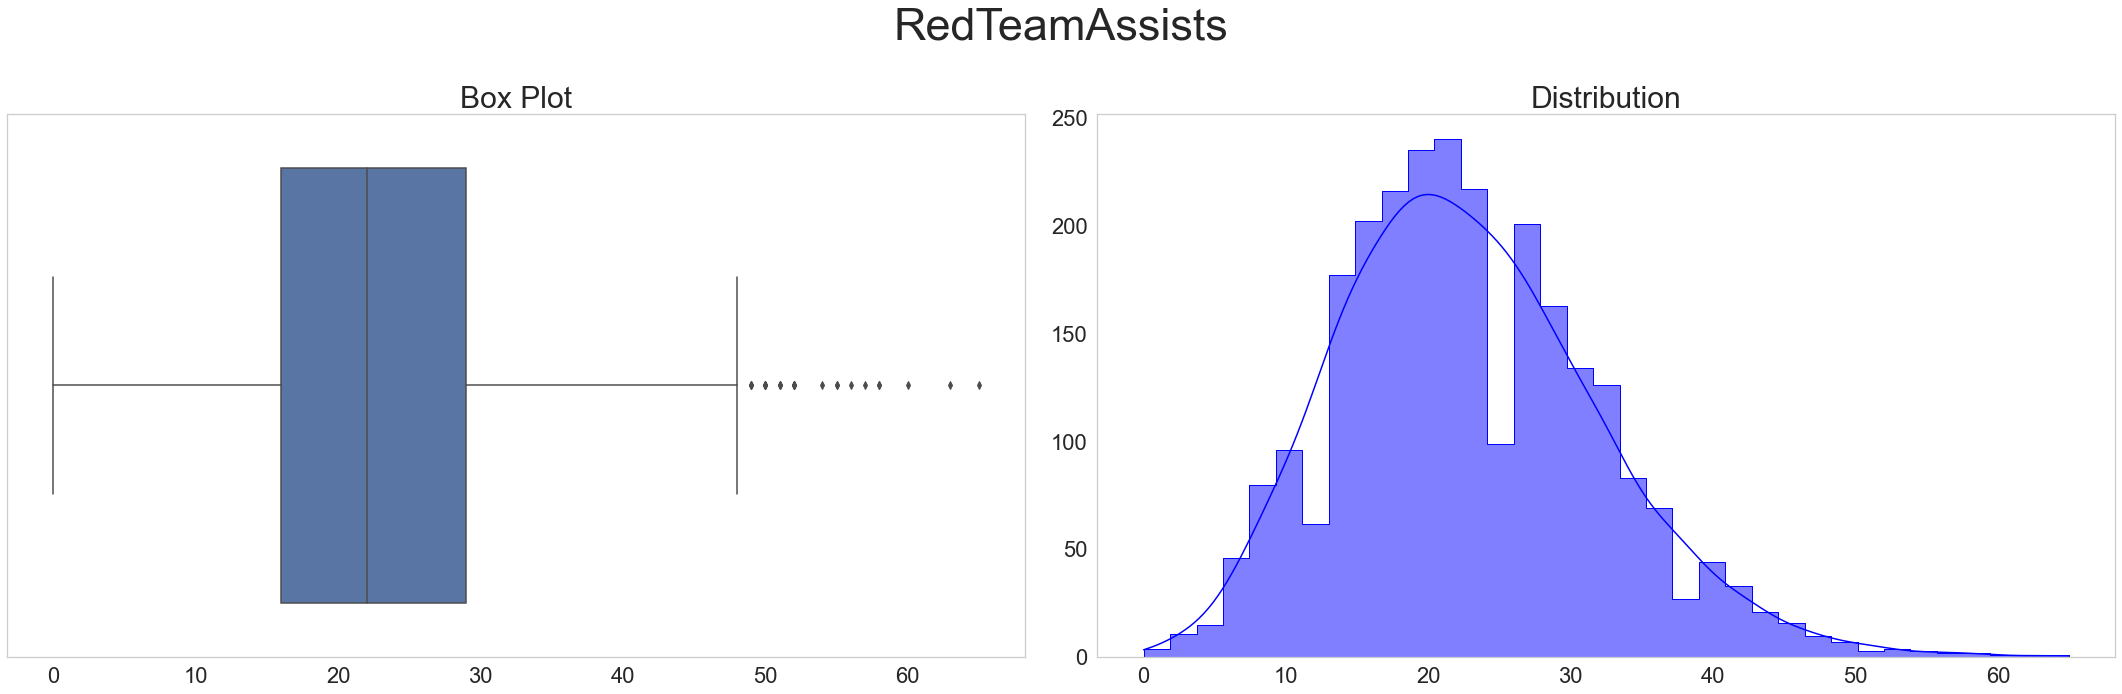

Summary Statistics for RedTeamAssists
count    2651.000000
mean       22.849868
std         9.237827
min         0.000000
25%        16.000000
50%        22.000000
75%        29.000000
max        65.000000
Name: RedTeamAssists, dtype: float64


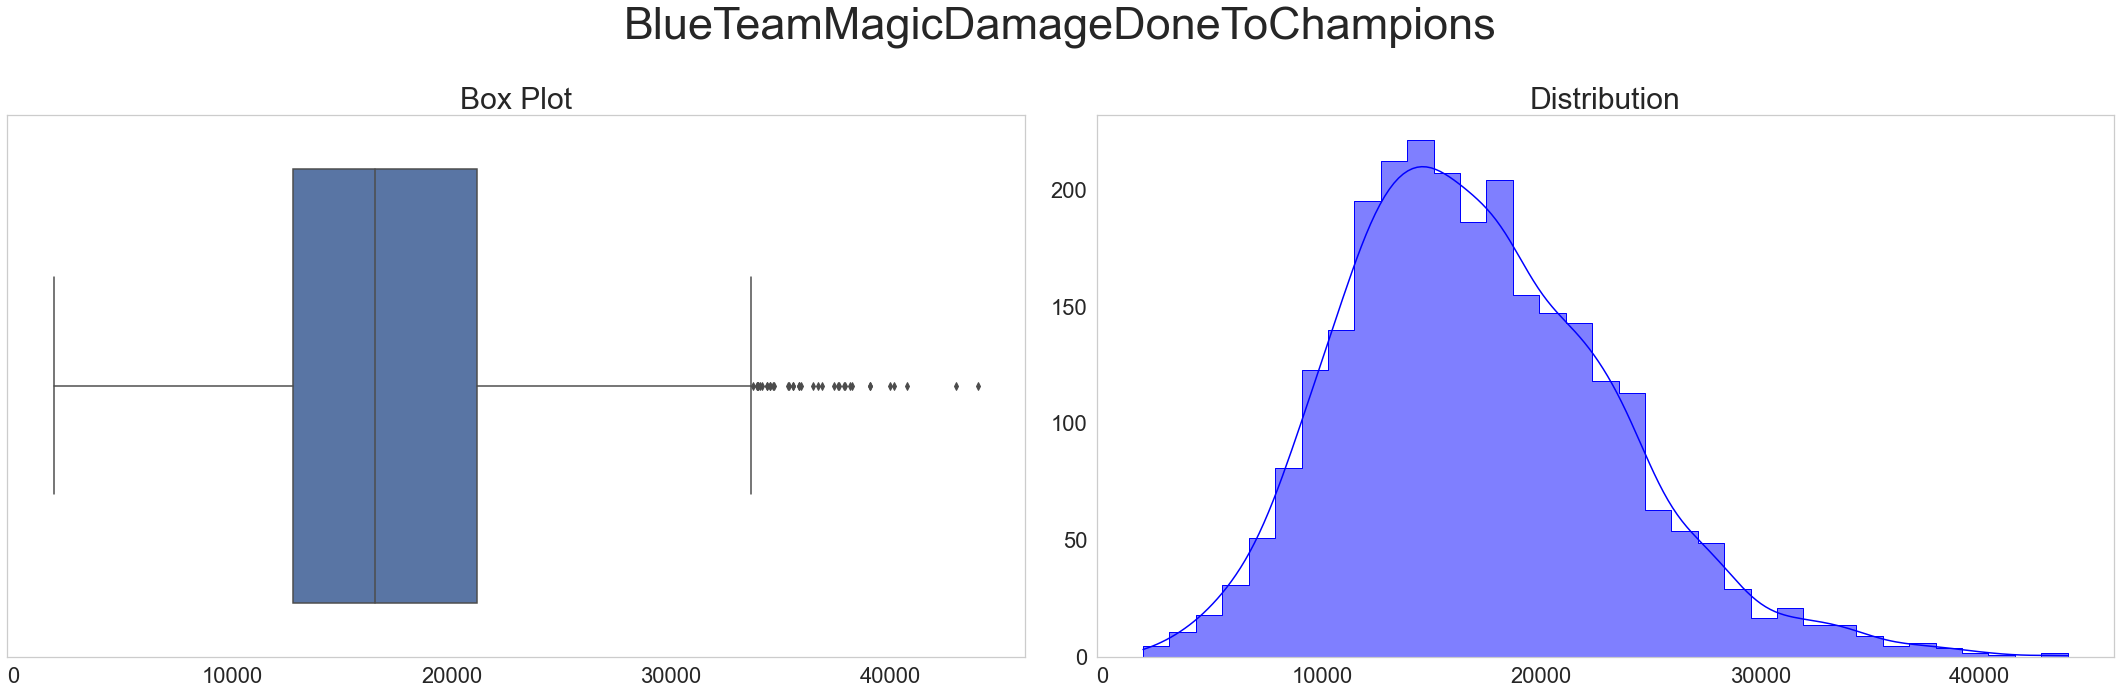

Summary Statistics for BlueTeamMagicDamageDoneToChampions
count     2651.000000
mean     17170.721237
std       6222.221995
min       1842.000000
25%      12737.500000
50%      16513.000000
75%      21126.000000
max      44015.000000
Name: BlueTeamMagicDamageDoneToChampions, dtype: float64


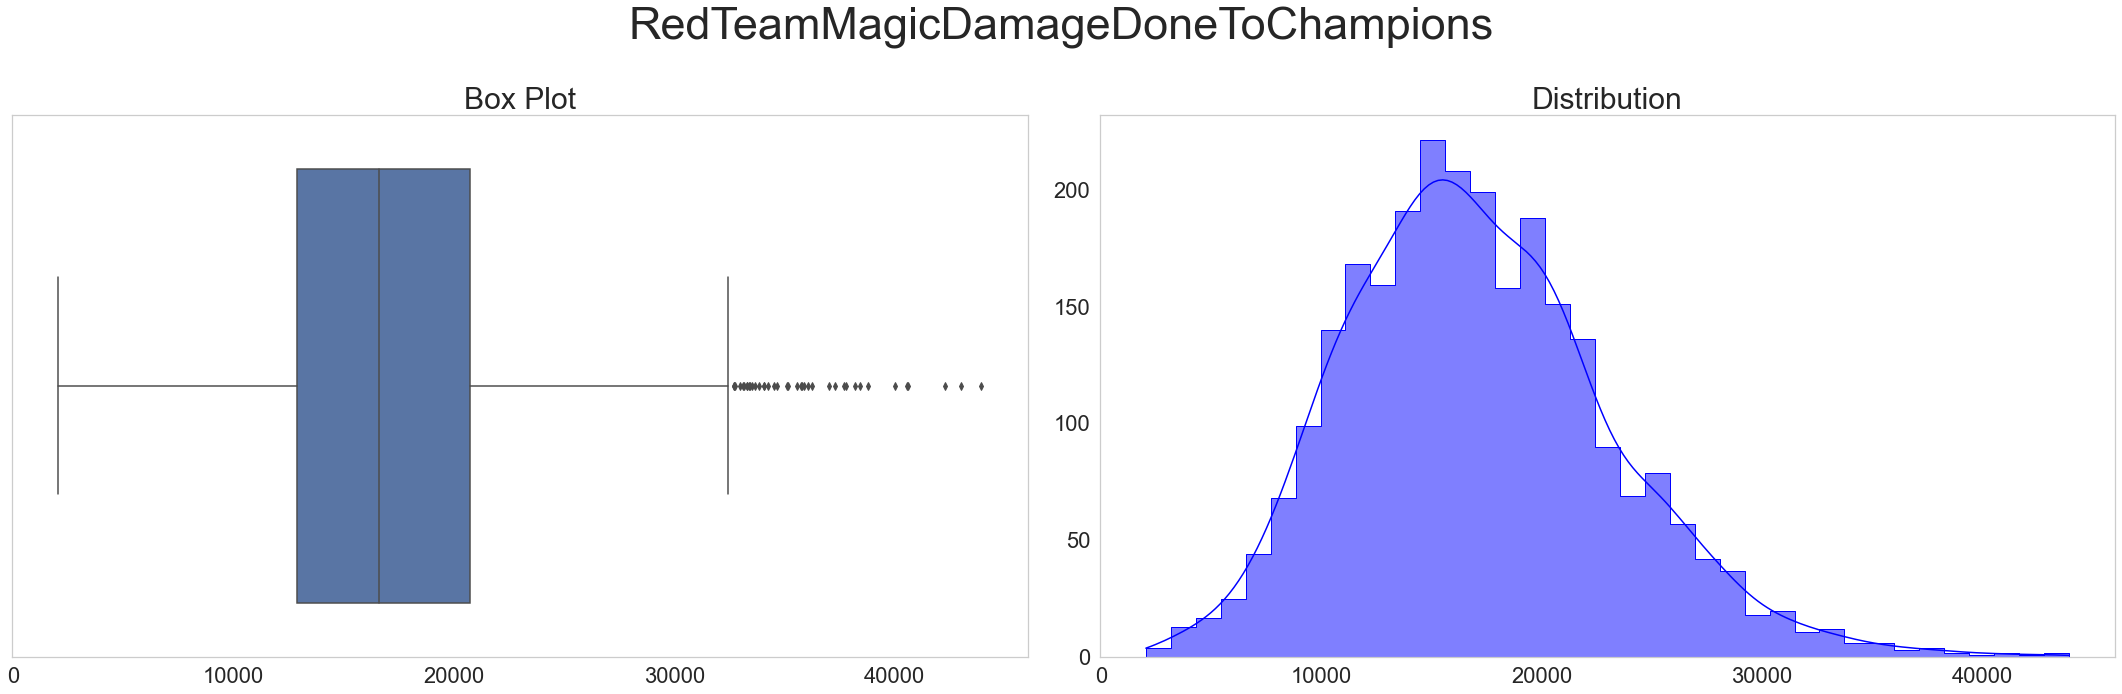

Summary Statistics for RedTeamMagicDamageDoneToChampions
count     2651.000000
mean     17145.744625
std       6047.922902
min       2043.000000
25%      12876.500000
50%      16600.000000
75%      20735.500000
max      43932.000000
Name: RedTeamMagicDamageDoneToChampions, dtype: float64


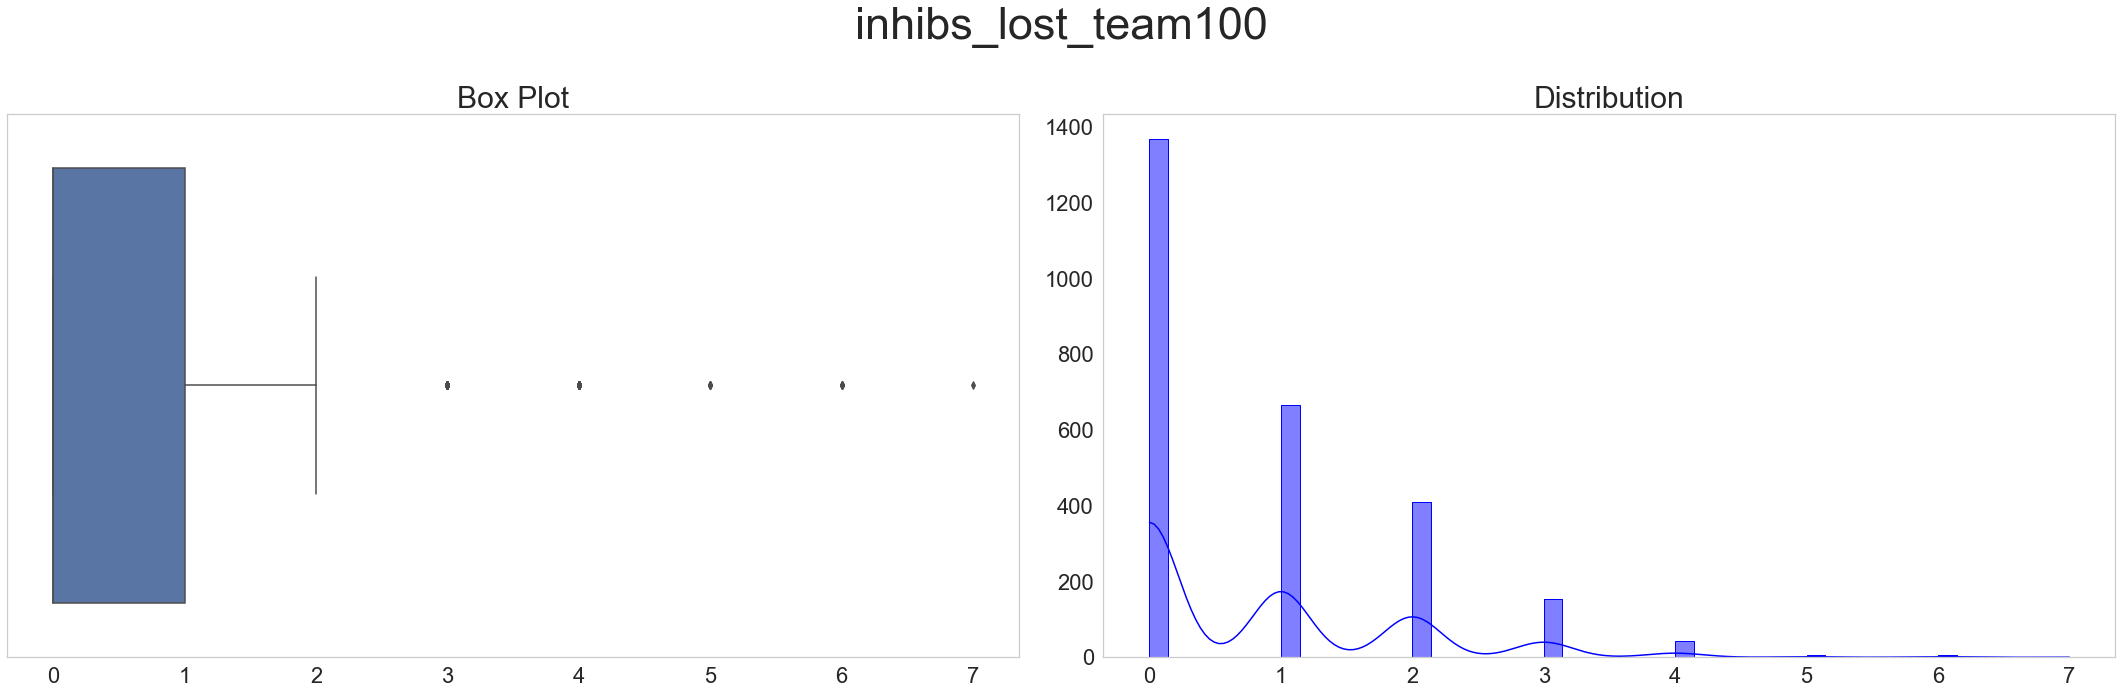

Summary Statistics for inhibs_lost_team100
count    2651.000000
mean        0.824594
std         1.058200
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: inhibs_lost_team100, dtype: float64


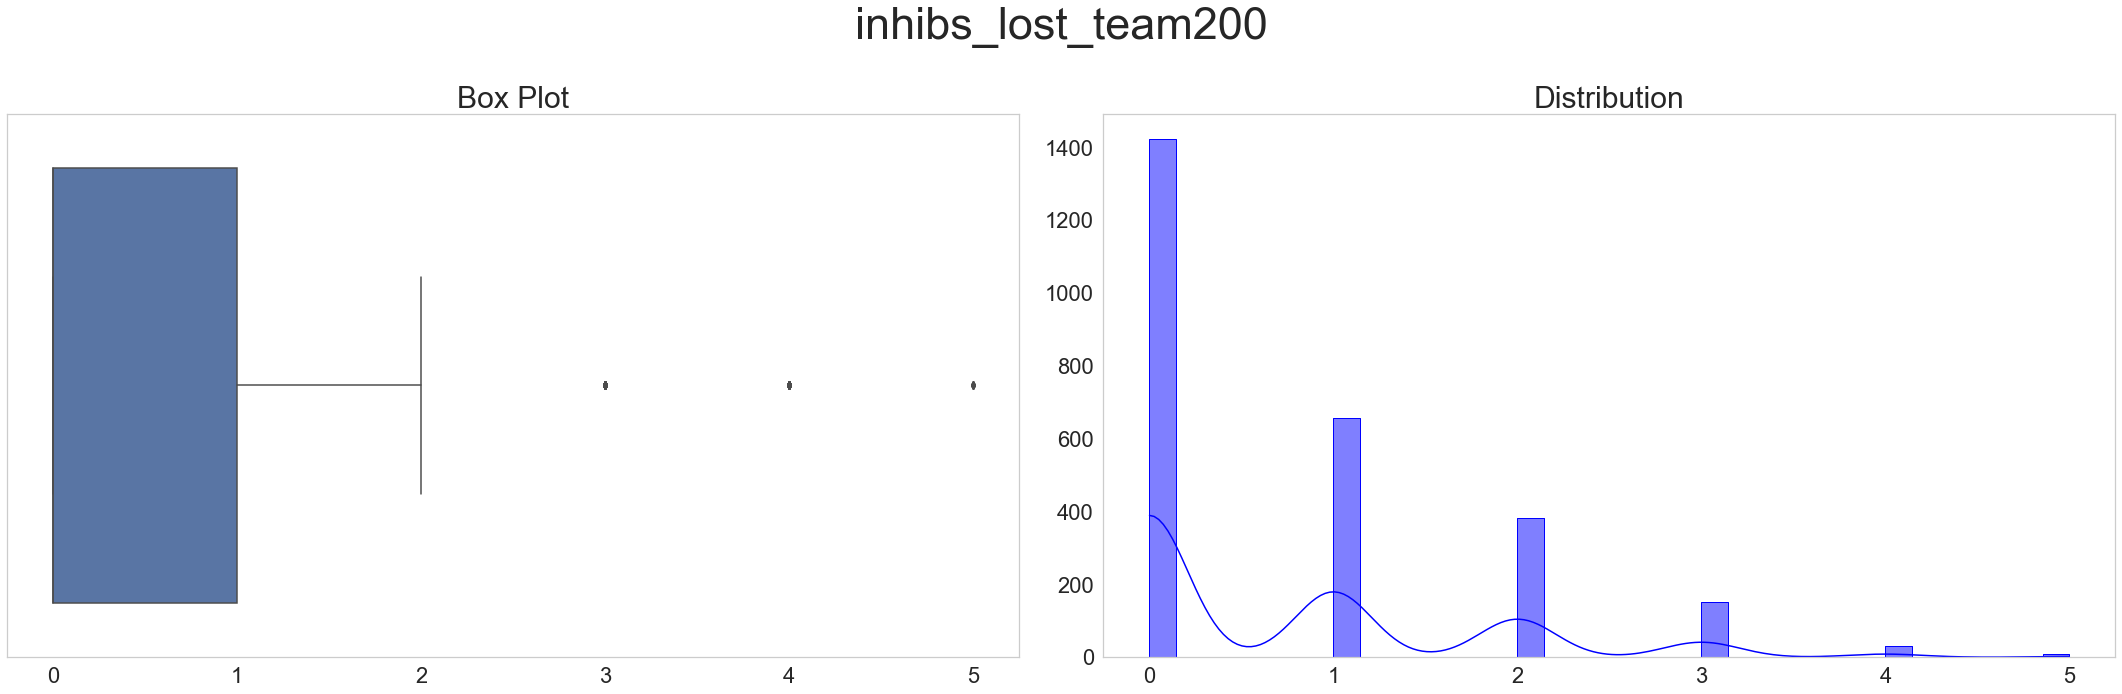

Summary Statistics for inhibs_lost_team200
count    2651.000000
mean        0.769898
std         1.006327
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: inhibs_lost_team200, dtype: float64


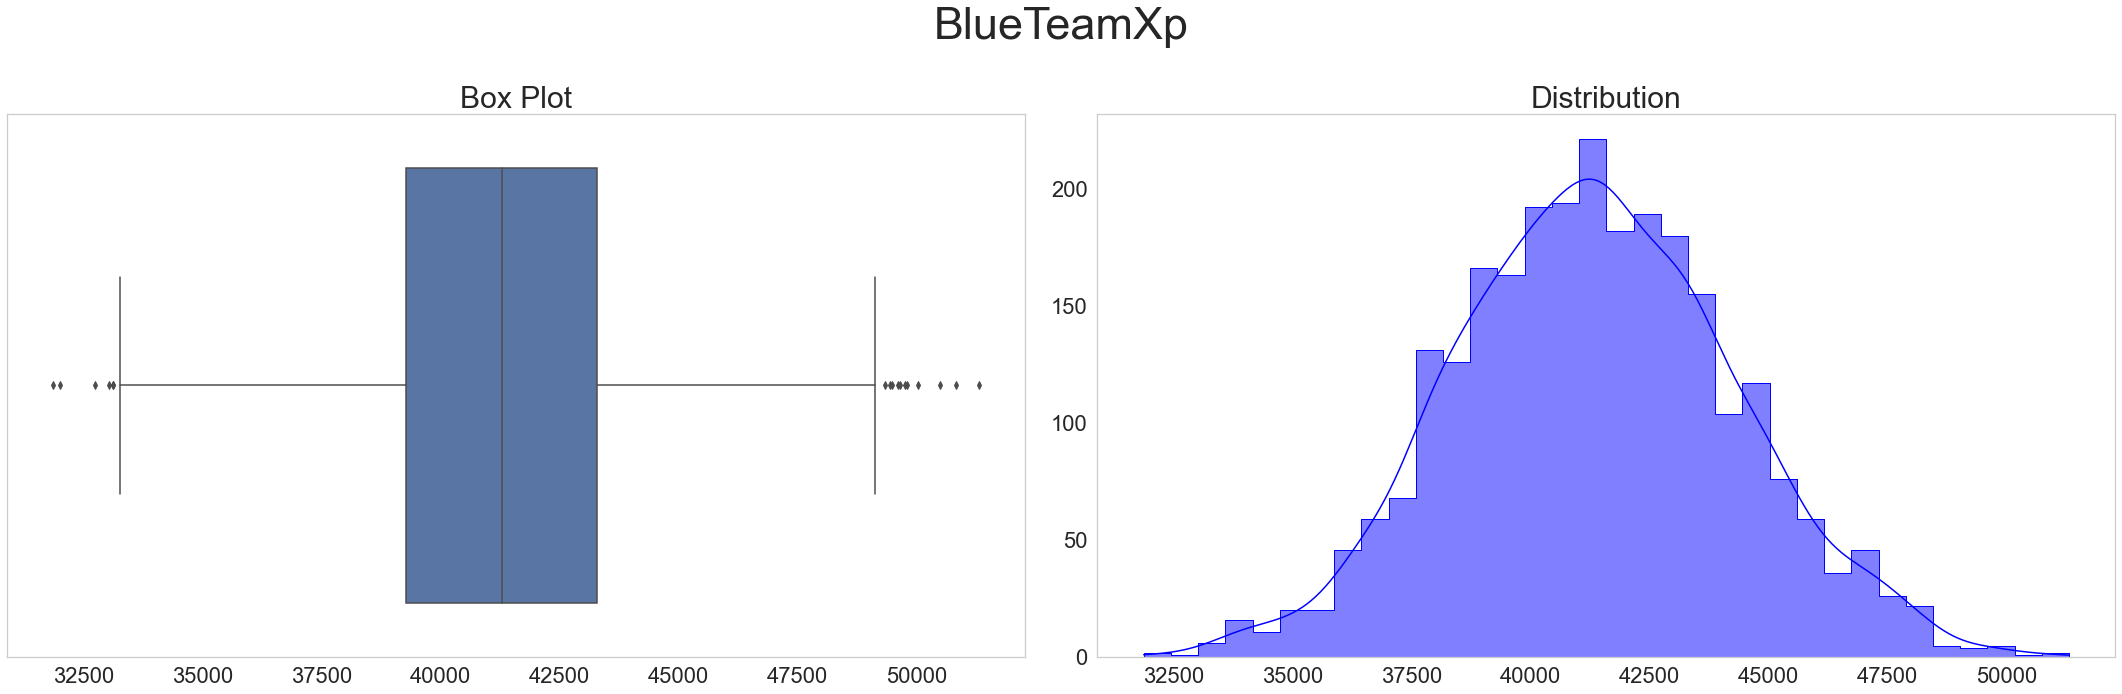

Summary Statistics for BlueTeamXp
count     2651.000000
mean     41335.245190
std       2952.813673
min      31876.000000
25%      39274.500000
50%      41285.000000
75%      43287.000000
max      51306.000000
Name: BlueTeamXp, dtype: float64


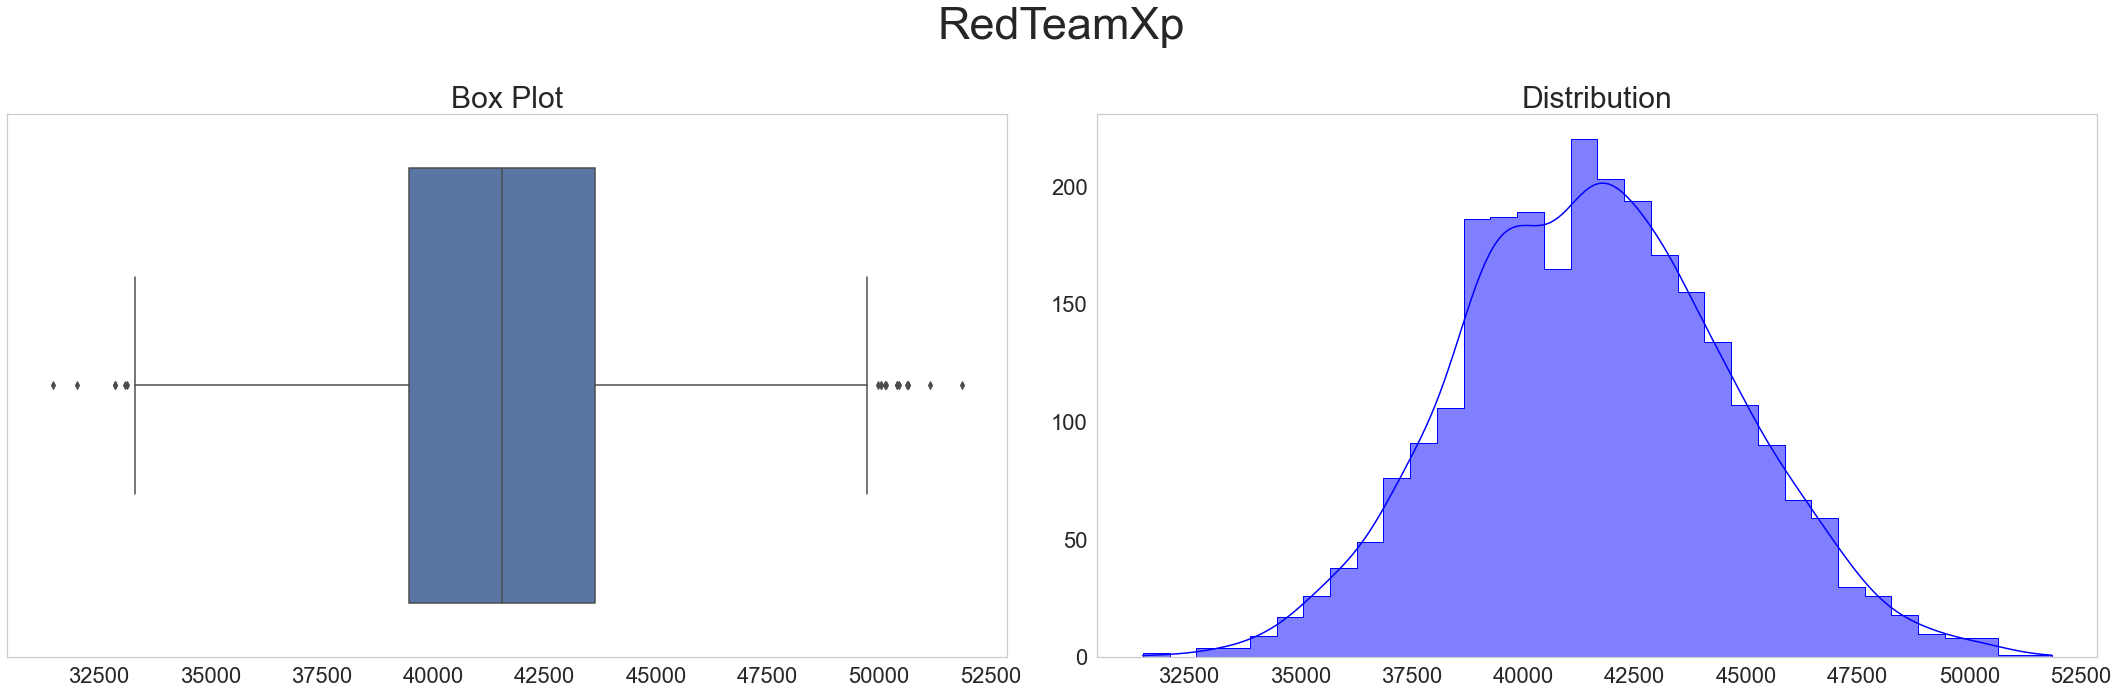

Summary Statistics for RedTeamXp
count     2651.000000
mean     41597.895134
std       3060.831982
min      31467.000000
25%      39461.500000
50%      41534.000000
75%      43619.500000
max      51852.000000
Name: RedTeamXp, dtype: float64


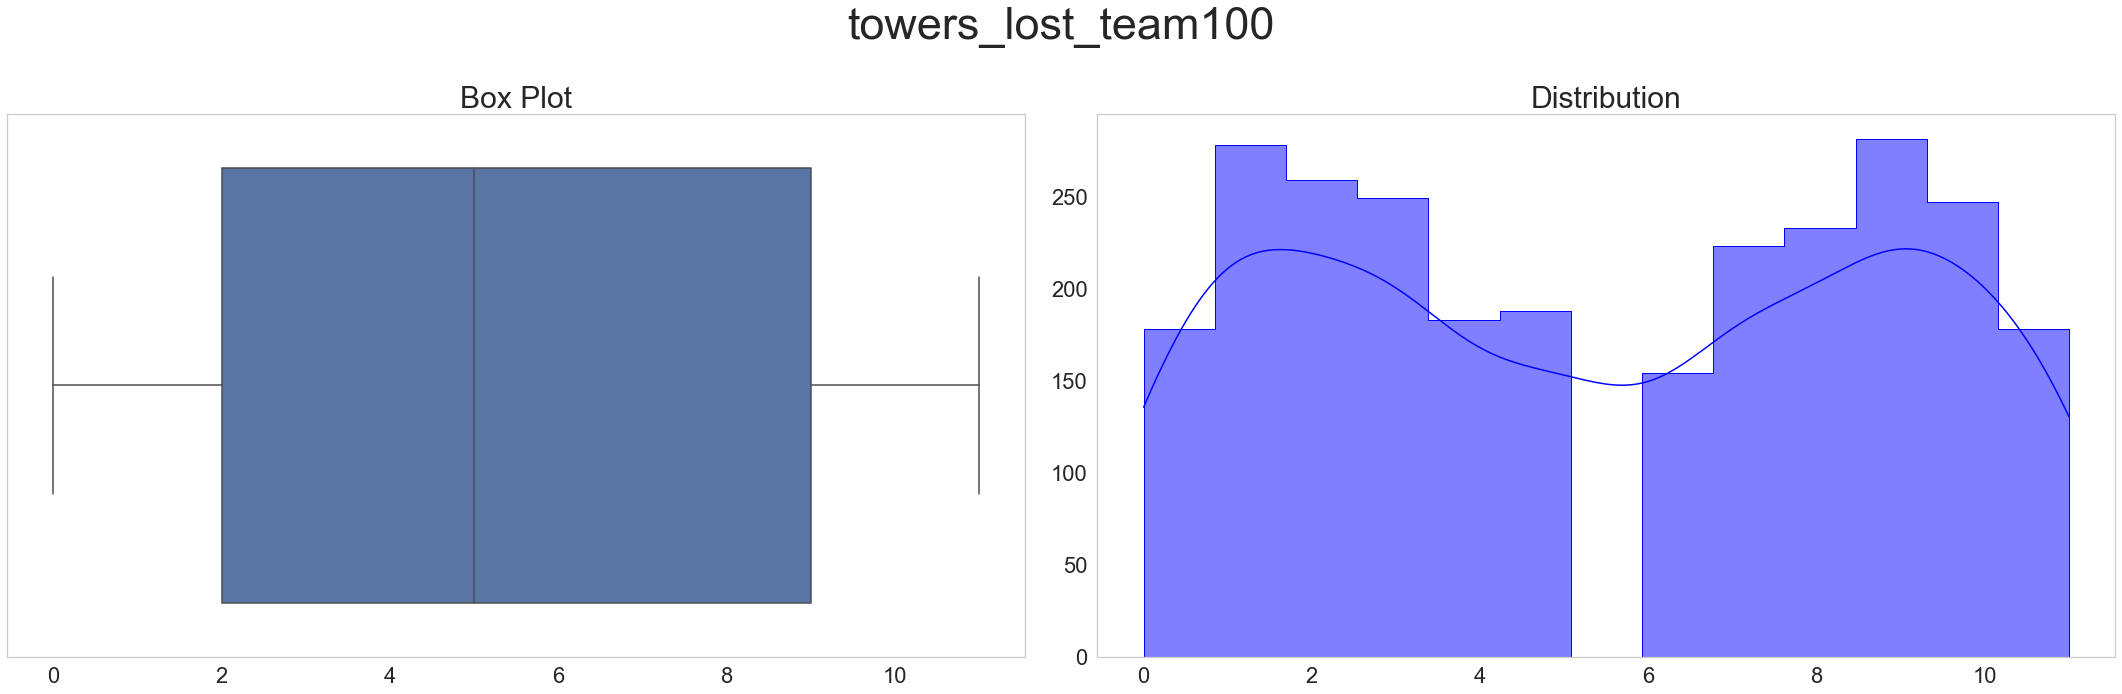

Summary Statistics for towers_lost_team100
count    2651.000000
mean        5.477556
std         3.476358
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        11.000000
Name: towers_lost_team100, dtype: float64


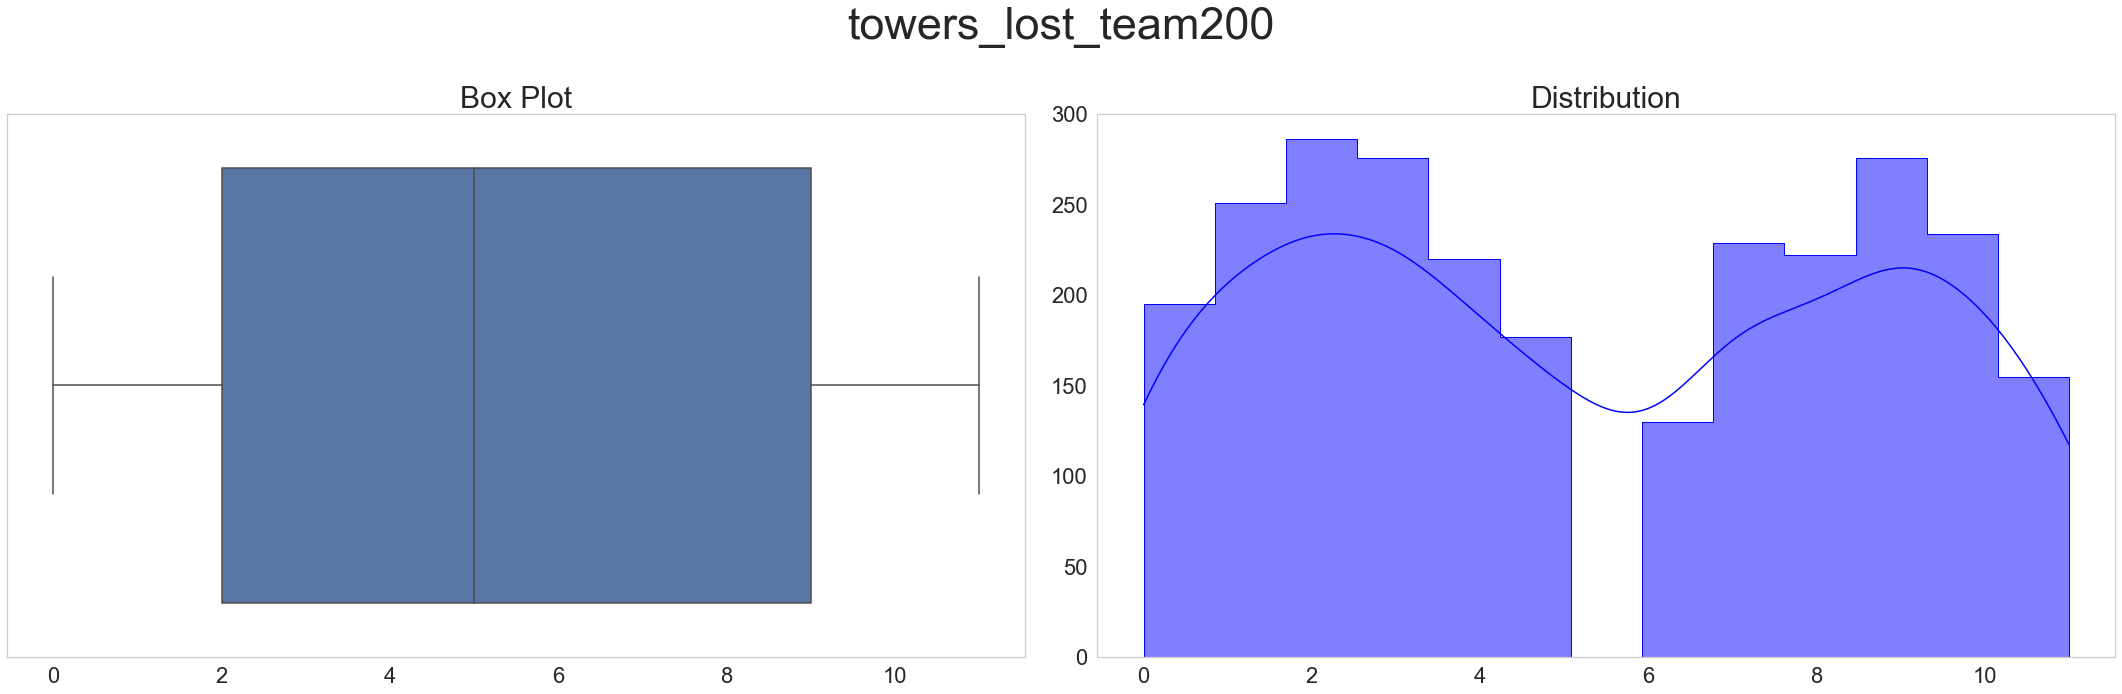

Summary Statistics for towers_lost_team200
count    2651.000000
mean        5.320257
std         3.442635
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        11.000000
Name: towers_lost_team200, dtype: float64


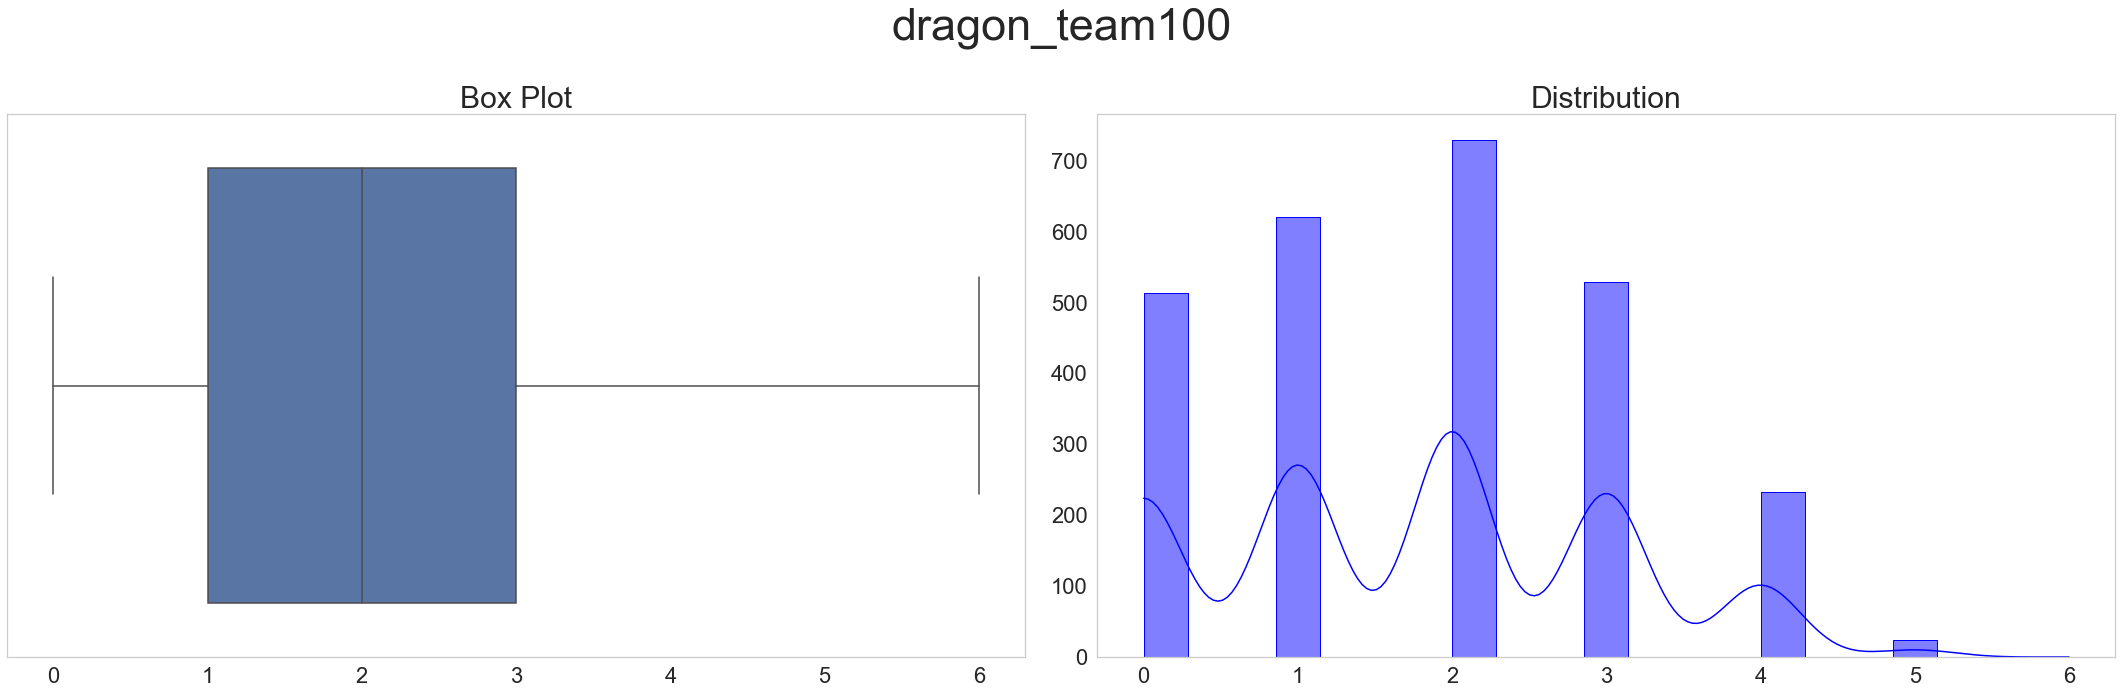

Summary Statistics for dragon_team100
count    2651.000000
mean        1.781969
std         1.265504
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: dragon_team100, dtype: float64


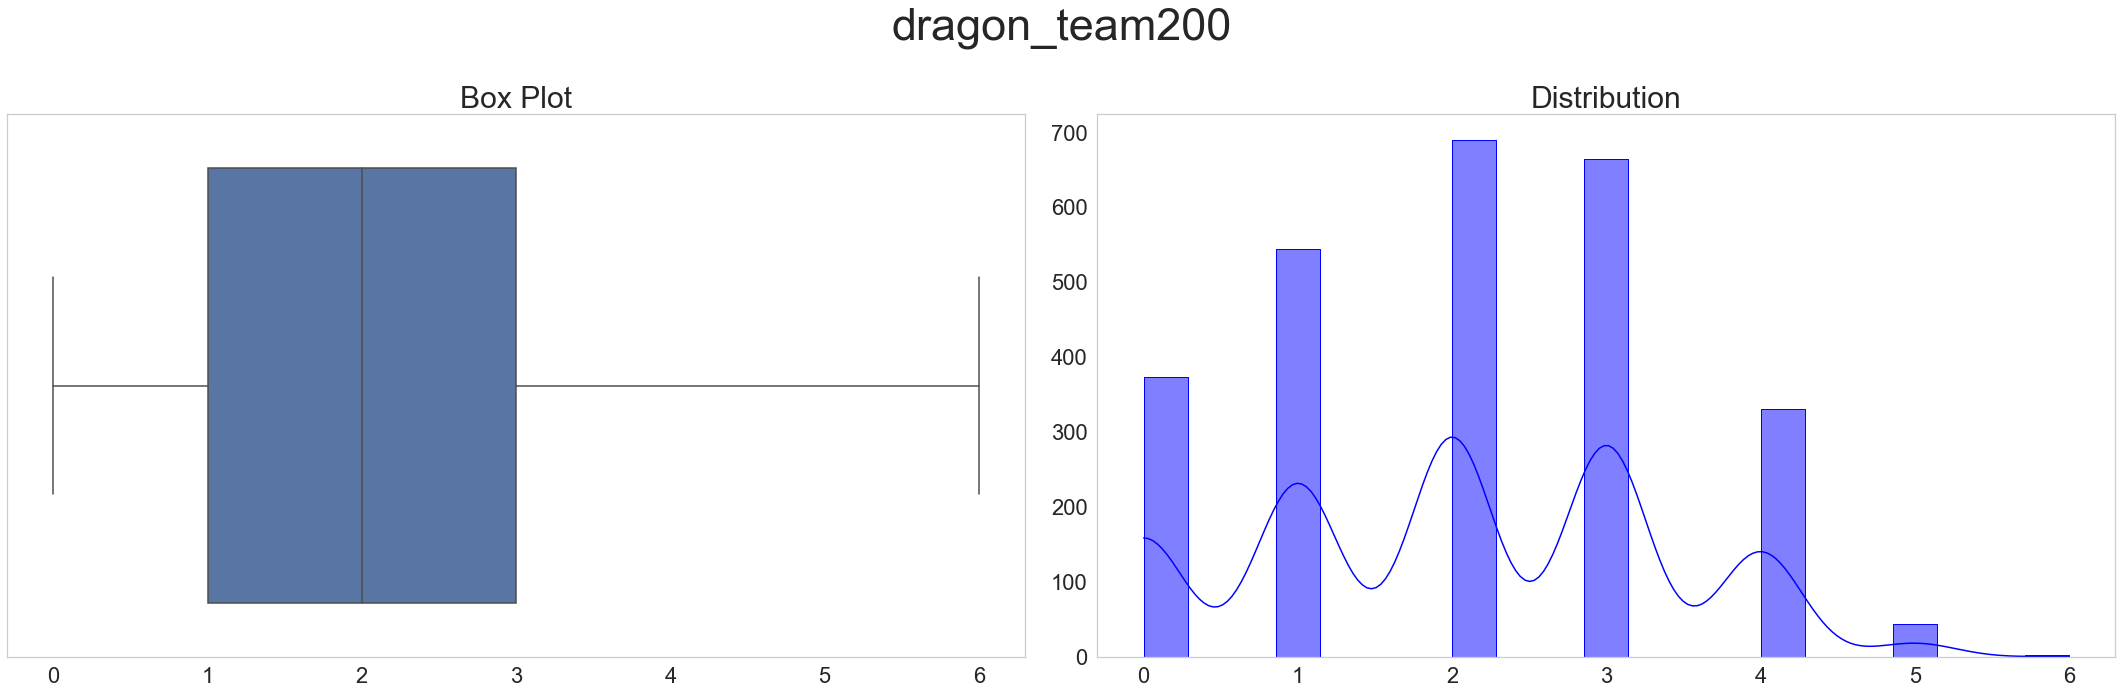

Summary Statistics for dragon_team200
count    2651.000000
mean        2.066767
std         1.297484
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: dragon_team200, dtype: float64


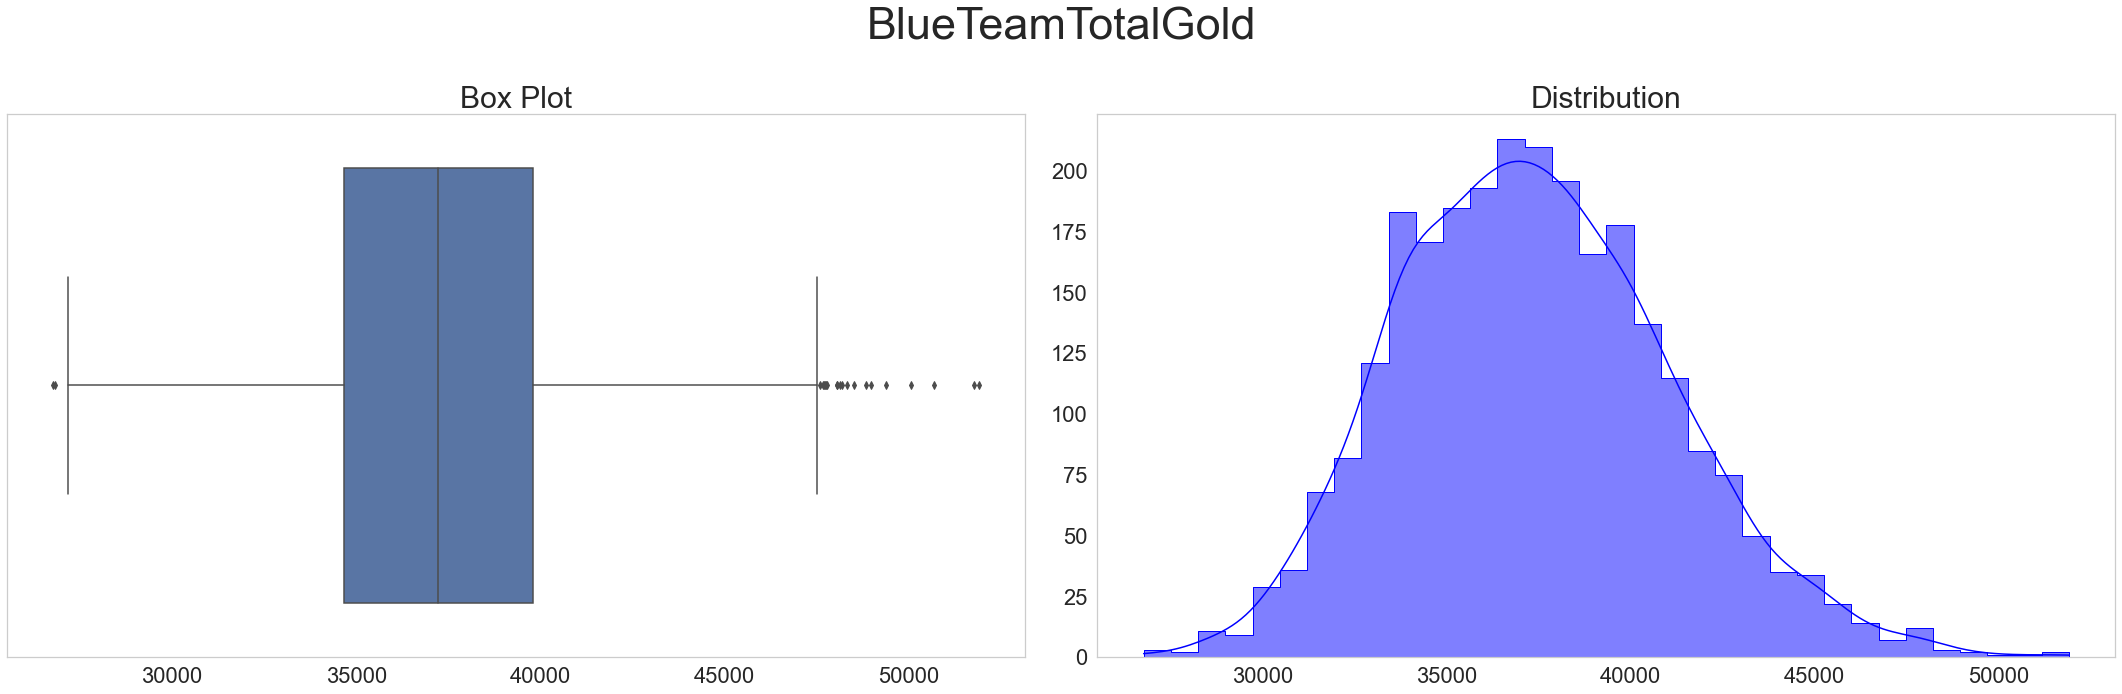

Summary Statistics for BlueTeamTotalGold
count     2651.000000
mean     37382.190871
std       3691.759091
min      26779.000000
25%      34674.000000
50%      37214.000000
75%      39807.500000
max      51910.000000
Name: BlueTeamTotalGold, dtype: float64


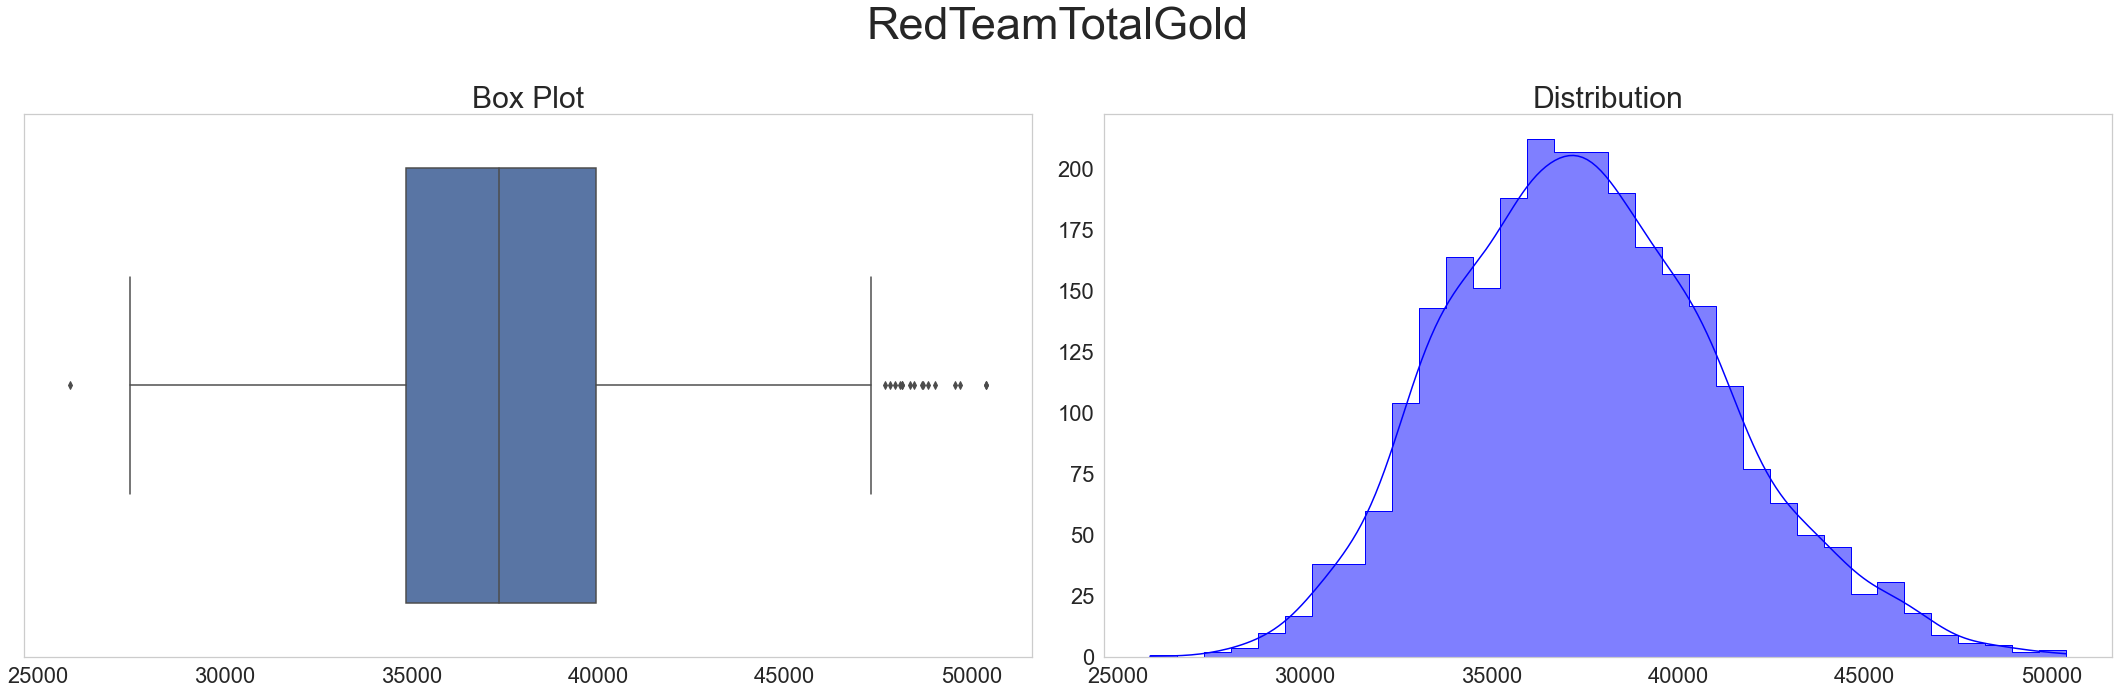

Summary Statistics for RedTeamTotalGold
count     2651.000000
mean     37547.800075
std       3676.475506
min      25855.000000
25%      34867.000000
50%      37354.000000
75%      39956.000000
max      50393.000000
Name: RedTeamTotalGold, dtype: float64


In [8]:
# univariate study
univariate_study = ["winningTeam","BlueTeamWards","RedTeamWards","BlueTeamAssists","RedTeamAssists","BlueTeamMagicDamageDoneToChampions","RedTeamMagicDamageDoneToChampions","inhibs_lost_team100","inhibs_lost_team200","BlueTeamXp","RedTeamXp","towers_lost_team100","towers_lost_team200","dragon_team100","dragon_team200","BlueTeamTotalGold","RedTeamTotalGold"]

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

<Figure size 864x576 with 0 Axes>

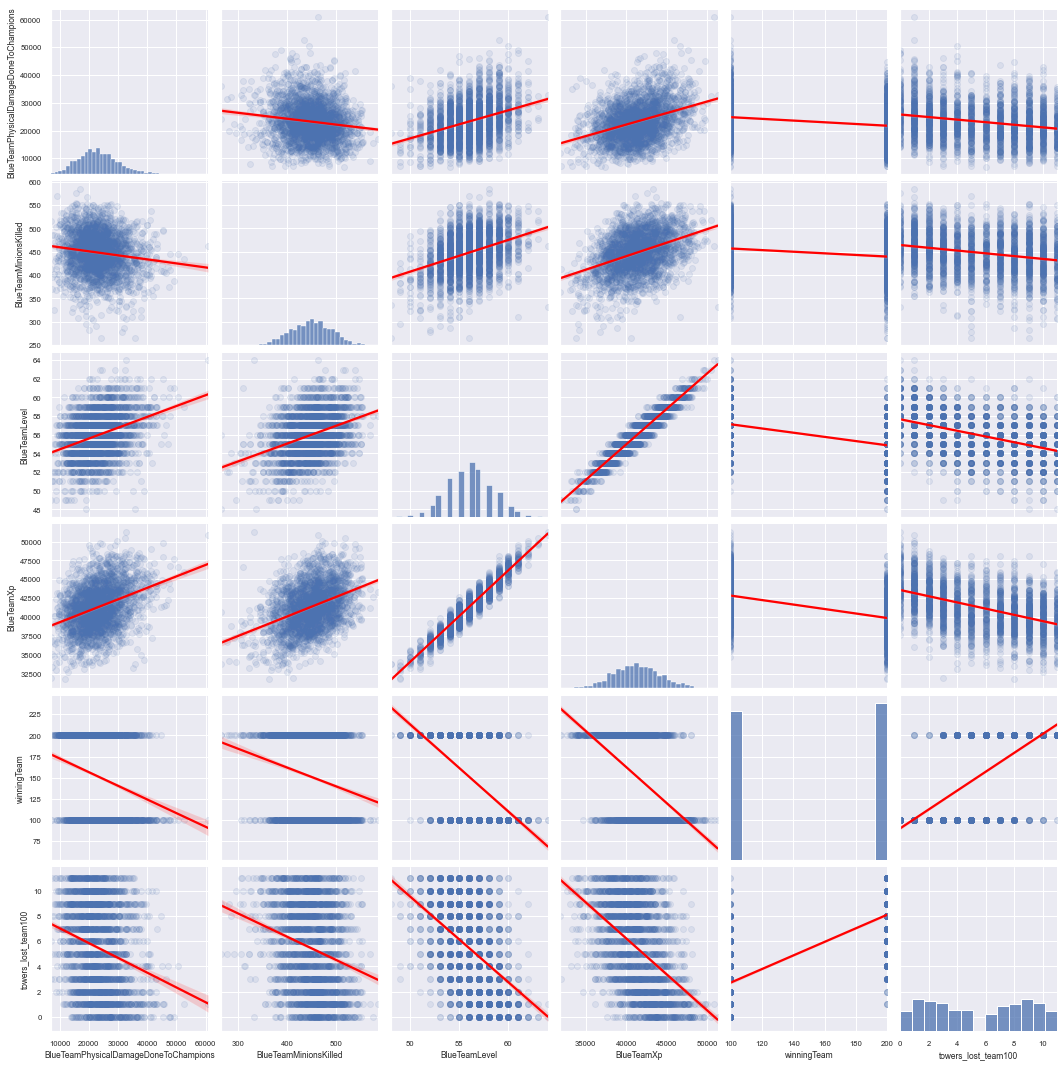

In [9]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['BlueTeamPhysicalDamageDoneToChampions', 'BlueTeamMinionsKilled','BlueTeamLevel', 'BlueTeamXp','winningTeam','towers_lost_team100']
#pairplots 
sns.set(font_scale=.7)
plt.figure(figsize=(12,8))
plot_variable_pairs(train, cols)

## Variabe Pairs Takeaway

- Blue team xp increases with increase damage to opponents champion
- Blue team xp increases with the increase in kills of minions
- Blue team xp decreases as blue team lost towers
- Blue team levels did not increase as blue team lost towers

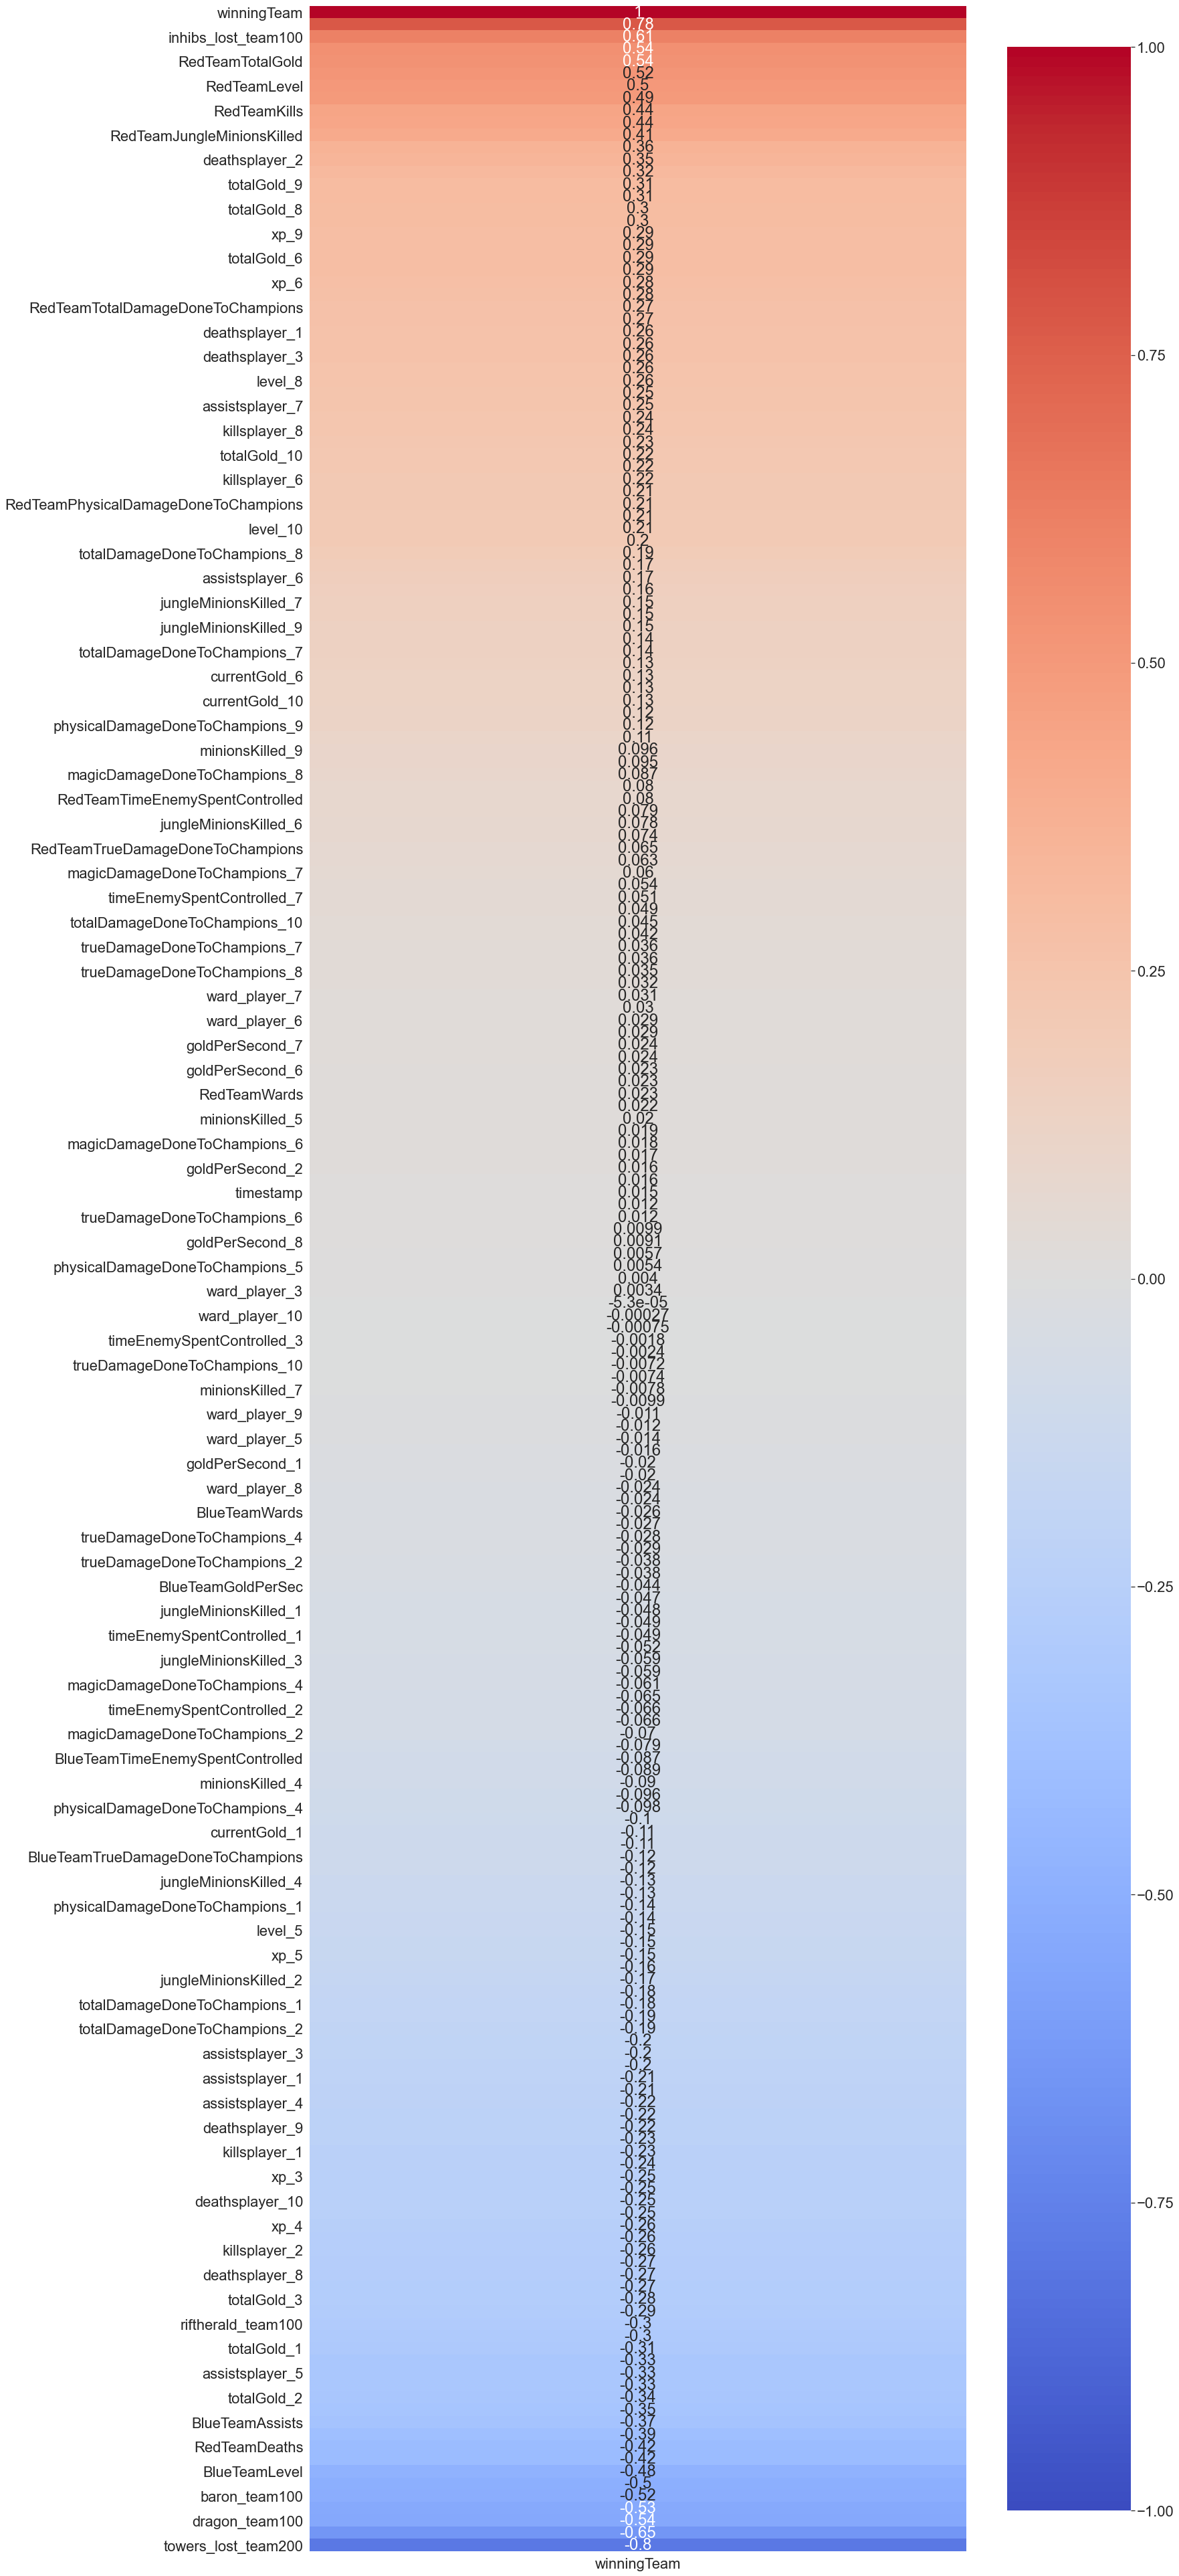

In [10]:
## Heatmap 
sns.set(font_scale=2)
plt.figure(figsize=(22,70))
heatmap = sns.heatmap(train.corr()[['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [11]:
cols = ["winningTeam","BlueTeamWards","RedTeamWards","BlueTeamAssists","inhibs_lost_team100","BlueTeamMagicDamageDoneToChampions","RedTeamMagicDamageDoneToChampions","RedTeamJungleMinionsKilled","inhibs_lost_team200","BlueTeamXp","RedTeamXp","towers_lost_team100","towers_lost_team200","dragon_team100","dragon_team200","BlueTeamTotalGold","RedTeamTotalGold"]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.0001390871295925808. There is 0.0% chance that we see these results by chance.
r = 0.07


<Figure size 864x720 with 0 Axes>

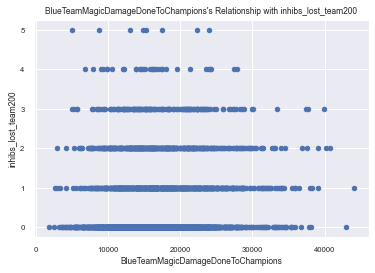

In [12]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamMagicDamageDoneToChampions', 'inhibs_lost_team200')
# Looks like magice damage done by blue team to champions decreases after 2 inhibitor lost by red team

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 6.78731055028098e-85. There is 0.0% chance that we see these results by chance.
r = -0.37


<Figure size 864x720 with 0 Axes>

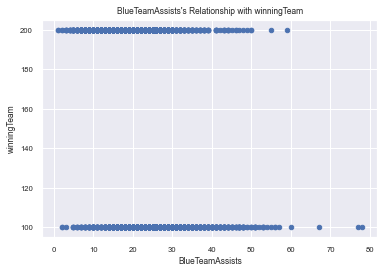

In [13]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamAssists', 'winningTeam')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 1.3788427765970484e-195. There is 0.0% chance that we see these results by chance.
r = -0.53


<Figure size 864x720 with 0 Axes>

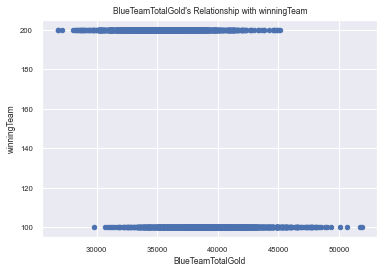

In [14]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamTotalGold', 'winningTeam')
# high correlation between total gold for blue team and the outcome

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.18919803513375133. There is 0.189% chance that we see these results by chance.
r = -0.03


<Figure size 864x720 with 0 Axes>

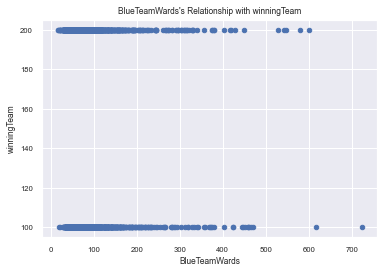

In [15]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamWards', 'winningTeam')
# no correlation

# Bivariate 

## Physical Damage

Damage by blue and outcome


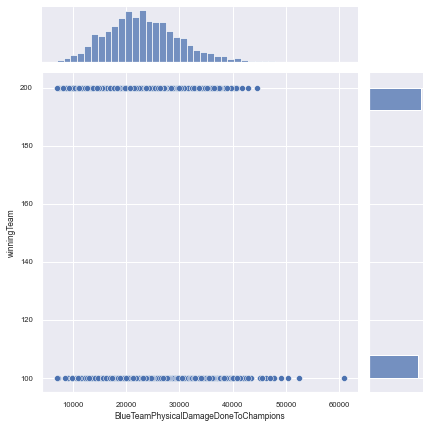

In [16]:
#winningTeam across physical damage to champions for blue team
print('Damage by blue and outcome')
sns.jointplot(x='BlueTeamPhysicalDamageDoneToChampions', y='winningTeam', data=train)
plt.xlabel('Damage')
plt.ylabel('Winning Team')
plt.show()


### Ho: Blue team total physical damage over 20k will not be significant for the outcome of the game

### Ha: Blue team total physical damage less then or equal 20k will be significant for the outcome of the game

In [17]:
# hypothesis testing

null_hypothesis = "BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_damage = train[train.BlueTeamPhysicalDamageDoneToChampions > 20_000]
little_damage = train[train.BlueTeamPhysicalDamageDoneToChampions <= 20_000]
t, p = stats.ttest_ind(big_damage.winningTeam, little_damage.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

2.3610614800570617e-20
Reject null hypothesis that: BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game


- Team damage over 20k does not effect the outcome of the game

## Team Level 

Team level blue and outcome


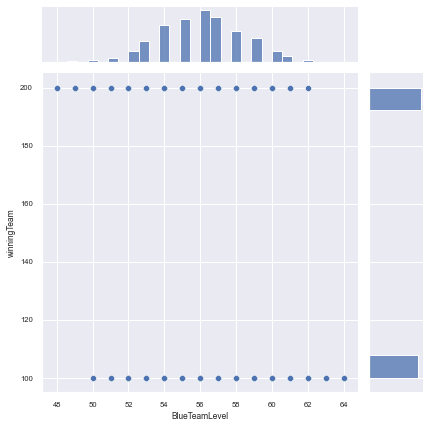

In [18]:
#winningTeam across team level for blue team
print('Team level blue and outcome')
sns.jointplot(x='BlueTeamLevel', y='winningTeam', data=train)
plt.xlabel('Team Level')
plt.ylabel('Winning Team')
plt.show()


### Ho: Average Blue team level of less then 55  will not be significant for the outcome of the game

### Ha: Average Blue team level of 55 and over will be significant for the outcome of the game

In [19]:
# hypothesis testing

null_hypothesis = "BlueTeamLevel < 55 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamLevel > 55 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_level = train[train.BlueTeamLevel > 55]
little_level = train[train.BlueTeamLevel <= 55]
t, p = stats.ttest_ind(big_level.winningTeam, little_level.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

3.8285585697277075e-110
Reject null hypothesis that: BlueTeamLevel < 55 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamLevel > 55 has a difference in the outcome of the game


- A team who has an average level of 55 and over has significant effect on the game

## Wards

Team ward blue and outcome


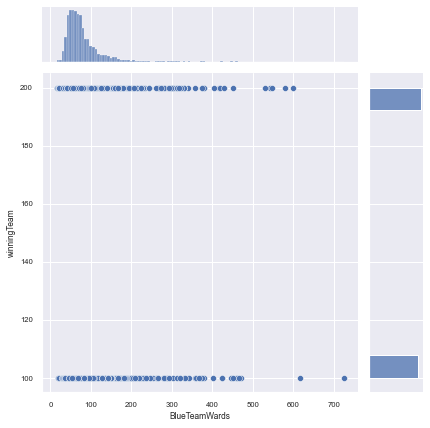

In [20]:
#winningTeam across team ward for blue team
print('Team ward blue and outcome')
sns.jointplot(x='BlueTeamWards', y='winningTeam', data=train)
plt.xlabel('Team Ward')
plt.ylabel('Winning Team')
plt.show()


## Ho: Blue team wards less then 88 will not make a difference in the outcome of the game

## Ha: Blue team wards greater then 88 will make a difference in the outcome of the game

In [21]:
# hypothesis testing

null_hypothesis = "BlueTeamWards < 88 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamWards > 88 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_ward = train[train.BlueTeamWards > 88]
little_ward = train[train.BlueTeamWards <= 88]
t, p = stats.ttest_ind(big_ward.winningTeam, little_ward.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.37998813942950527
Fail to reject null hypothesis that: BlueTeamWards < 88 has no difference in the outcome of the game There is not sufficient evidence to reject it.


## Team Assists

Team assists blue and outcome


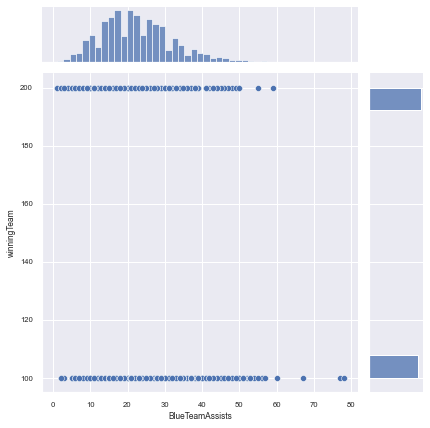

In [22]:
#winningTeam across team assists for blue team
print('Team assists blue and outcome')
sns.jointplot(x='BlueTeamAssists', y='winningTeam', data=train)
plt.xlabel('Team Assists')
plt.ylabel('Winning Team')
plt.show()

## Ho: Blue team with assists under 22 will not have a difference in the outcome of the game

## Ha: Blue team with assists over 22 will have a difference in the outcome of the game

In [23]:
# hypothesis testing

null_hypothesis = "BlueTeamAssists < 22 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamAssists > 22 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_assists = train[train.BlueTeamAssists > 22]
little_assists = train[train.BlueTeamAssists <= 22]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

1.6586417890276632e-61
Reject null hypothesis that: BlueTeamAssists < 22 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamAssists > 22 has a difference in the outcome of the game


## Towers 

Team towers taken and outcome


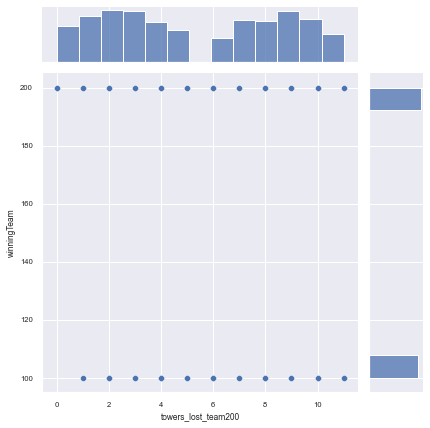

In [24]:
#winningTeam across towers taken for blue team
print('Team towers taken and outcome')
sns.jointplot(x='towers_lost_team200', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

## Ho: Red team that loses less then 5 towers will not have a difference in the outcome of the game

## Ha: Red team that loses more then 5 towers will have a difference in the outcome of the game

In [25]:
# hypothesis testing

null_hypothesis = "Red team towers lost < 5 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > 5 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > 5]
little_loss = train[train.towers_lost_team200 <= 5]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.0
Reject null hypothesis that: Red team towers lost < 5 has no difference in the outcome of the game
There is evidence to suggest: Red team towers lost > 5 has a difference in the outcome of the game


Team dragons taken and outcome


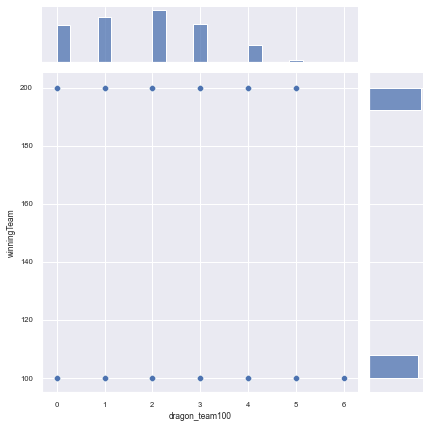

In [26]:
#winningTeam and dragon taken for blue team
print('Team dragons taken and outcome')
sns.jointplot(x='dragon_team100', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

In [27]:
# hypothesis testing

null_hypothesis = "Blue team takes < 2 dragons has no difference in the outcome of the game"
alternative_hypothesis = "Blue team takes > 2 dragons has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_gain = train[train.dragon_team100 > 2]
little_gain = train[train.dragon_team100 <= 2]
t, p = stats.ttest_ind(big_gain.winningTeam, little_gain.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

6.986770403820479e-105
Reject null hypothesis that: Blue team takes < 2 dragons has no difference in the outcome of the game
There is evidence to suggest: Blue team takes > 2 dragons has a difference in the outcome of the game


## Multivariate 

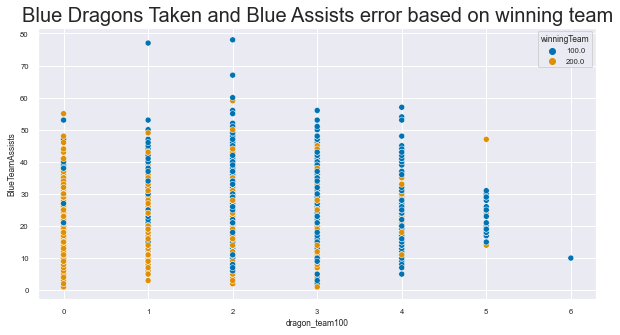

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='dragon_team100',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Dragons Taken and Blue Assists error based on winning team', fontsize = 20)
plt.show()

- Blue team more then likely to win if the assist were above 30 and 2 or more dragons killed

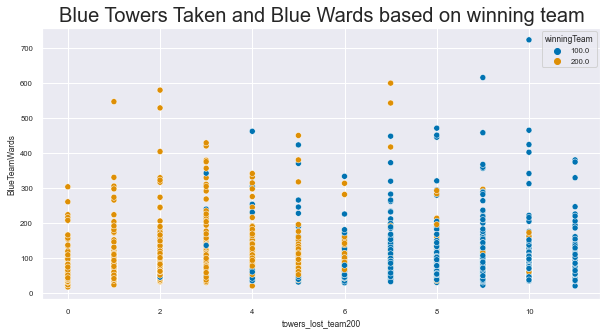

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='towers_lost_team200',y='BlueTeamWards',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Towers Taken and Blue Wards based on winning team', fontsize = 20)
plt.show()

- Wards may have a minor role, however the number of towers blue team won atleast 4 or more is a key factor in the outcome

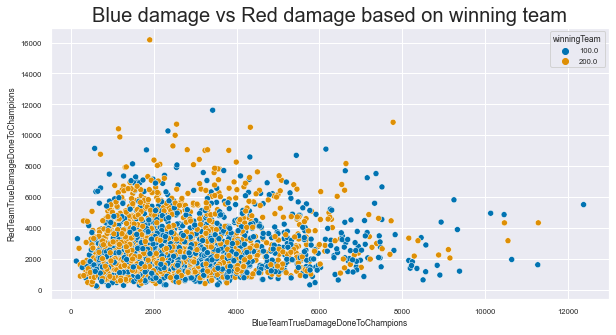

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamTrueDamageDoneToChampions',y='RedTeamTrueDamageDoneToChampions',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue damage vs Red damage based on winning team', fontsize = 20)
plt.show()

- Blue had more damage then red team which led to more wins

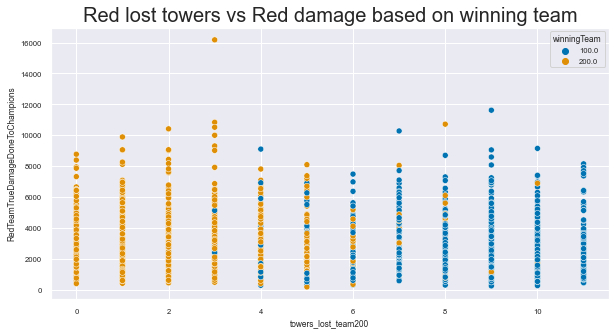

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='towers_lost_team200',y='RedTeamTrueDamageDoneToChampions',data=train,hue='winningTeam', palette='colorblind')
plt.title('Red lost towers vs Red damage based on winning team', fontsize = 20)
plt.show()

- losing towers to blue team is more important then total damage by red team

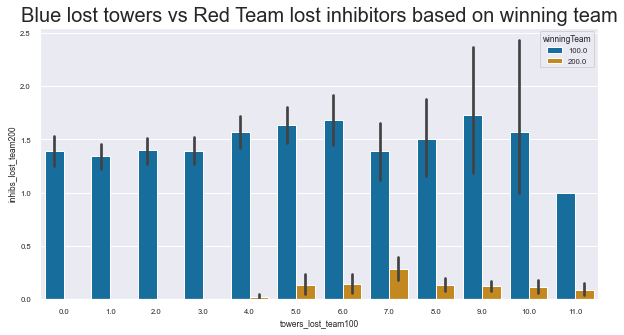

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='towers_lost_team100',y='inhibs_lost_team200',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue lost towers vs Red Team lost inhibitors based on winning team', fontsize = 20)
plt.show()

- even if blue team lost towers, if red team lost 1 inhibitor the outcome is blue team winning